In [43]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import subprocess

import sys
from copy import copy
import scipy
import imageio
sys.path.append("../")
import itertools
from scipy.stats import norm
import matplotlib.mlab as mlab
from mvgavg import mvgavg

save_folder = "G:/DREAM/from_github/thesis/Figures/LDA/"
import seaborn as sns

from random import randrange
from joblib import wrap_non_picklable_objects


from alienlab import utils
import alienlab
from alienlab import regression_func
import pickle as pk
from alienlab import plot
from activation_experiment import activation_experiment


import skimage.registration


from useful_func import dtw, get_path, plot_warped_timeseries
from useful_func import spectrum_a, spectrum_d
from useful_func import residuals, exp_decay, get_fit, sigmoid, exp_decay_max
from useful_func import gradient_magnitude, gradient_orientation, gaussian_kernel, assign_orientation, crop_center, cconv, get_algae_im
from numpy import genfromtxt

from joblib import Parallel, delayed
from useful_func import make_svm, make_pca
from sklearn.decomposition import PCA

from mpl_toolkits.axes_grid1 import make_axes_locatable



import sklearn
import sklearn.discriminant_analysis
import pandas as pd


import skimage

from useful_func import fit_biexp, fit_exp, fit_monoexp

import tifffile as tiff
import random
%matplotlib widget

g = plot.PlotFigure()
g.fontsize=17


def make_lda(n_components, train_data, Y_train_label):
    lda = sklearn.discriminant_analysis.LinearDiscriminantAnalysis(n_components = 3)
    M = train_data.mean(axis = 0)
    S = train_data.std(axis = 0)   
    train_data = (train_data - M)/S
    lda.fit(train_data,Y_train_label)
    X = lda.transform(train_data)
    print(X.shape)
    print("LDA components:")
    #lt.matshow(lda.scalings_)
    plt.figure()
    print("LDA explained variance:")
    plt.semilogy(lda.explained_variance_ratio_)
    plt.ylabel("eignevalue")
    plt.xlabel("component")

    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    ax.scatter(X[:, 0], X[:, 1], X[:,2], c=Y_train_label)##
    #plt.plot(boundary[:,0], boundary[:,1], c = 'k')
    plt.xlabel("LD1")
    plt.ylabel("LD2")
    return lda, M, S

def make_pca(n_components, train_data, Y_train_label):
    pca = PCA(n_components=n_components)
    M = train_data.mean(axis = 0)
    S = train_data.std(axis = 0)   
    train_data = (train_data - M)/S
    pca.fit(train_data)
    X = pca.transform(train_data)
    print("PCA components:")
    plt.matshow(pca.components_)
    pca.scalings_ = pca.components_.T
    plt.figure()
    print("PCA explained variance:")
    plt.semilogy(pca.explained_variance_)
    plt.ylabel("eignevalue")
    plt.xlabel("component")

    plt.figure()
    plt.scatter(X[:, 0], X[:, 1], c=Y_train_label)##
    #plt.plot(boundary[:,0], boundary[:,1], c = 'k')
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    return pca, M, S

def select_couples(positions_to_keep, arr):
    pos = np.where(arr.shape == np.array([len(positions_to_keep)]*len(arr.shape)))[0]
    if pos == 0: 
        arr = arr[positions_to_keep]
    elif pos == 1:
        arr = arr[:, positions_to_keep]
    elif pos == 2:
        arr = arr[:,:, positions_to_keep]
    
    return arr

https://ml-explained.com/blog/linear-discriminant-analysis-explained  
https://arxiv.org/pdf/1903.11240.pdf  
https://stats.stackexchange.com/questions/82497/can-the-scaling-values-in-a-linear-discriminant-analysis-lda-be-used-to-plot-e  


In [44]:

exp_set = []
exp_description = []
exp_position = []
exp_strain = []
photoinhibition_status = []
qE_status = []
qT_status = []

#ref_folder = 'Data_for_scanpy'
ref_folder = "../"
#0:stt71
#1:wt4
#2:npq4
#3:cc124
#4:WT222


if True:

    folder = ref_folder + "/FOLDER_2022_03_10_activation_4H_ENS_stt7"
    exp_description.append("stt7_001")
    exp_set.append(activation_experiment(folder))
    exp_position.append(2)
    exp_strain.append(0)
    photoinhibition_status.append(0)
    qE_status.append(0)
    qT_status.append(0)

if False: 
    folder = ref_folder + "/FOLDER_2022_07_01_stt7_act_noact"
    exp_description.append("stt7_combined_000")
    exp_set.append(activation_experiment(folder))
    exp_position.append(6)
    exp_strain.append(0)
    photoinhibition_status.append(0)
    qE_status.append(0)
    qT_status.append(0)
    
if True:

    folder =  ref_folder + "/FOLDER_2022_03_10_activation_4H_ENS_stt7"
    exp_description.append("stt7 qI_000")
    exp_set.append(activation_experiment(folder))
    exp_position.append(0)
    exp_strain.append(0)
    photoinhibition_status.append(1)
    qE_status.append(0)
    qT_status.append(0)
    



if True: 
    folder = ref_folder + "/FOLDER_2022_07_01_stt7_act_noact"
    exp_description.append("stt7_combined_010")
    exp_set.append(activation_experiment(folder))
    exp_position.append(7)
    exp_strain.append(0)
    photoinhibition_status.append(0)
    qE_status.append(0)
    qT_status.append(0)

if True: 
    folder = ref_folder + "/FOLDER_2022_07_01_wt4_noact"
    exp_description.append("wt4_combined_100")
    exp_set.append(activation_experiment(folder))
    exp_position.append(6)
    exp_strain.append(0)
    photoinhibition_status.append(0)
    qE_status.append(0)
    qT_status.append(0)
    

if True:

    folder =  ref_folder + "/FOLDER_2022_03_10_activation_4H_ENS_stt7"
    exp_description.append("stt7 qI_000")
    exp_set.append(activation_experiment(folder))
    exp_position.append(0)
    exp_strain.append(0)
    photoinhibition_status.append(1)
    qE_status.append(0)
    qT_status.append(0)
    
if True:

    folder =  ref_folder + "/FOLDER_2022_03_10_activation_4H_ENS_stt7"
    exp_description.append("stt7 qI qE_010")
    exp_set.append(activation_experiment(folder))
    exp_position.append(1)
    exp_strain.append(0)
    photoinhibition_status.append(1)
    qE_status.append(1)
    qT_status.append(0)

#################################    

if False:

    folder =  ref_folder + "/FOLDER_2022_03_08_activation_4H_ENS_wt4"
    exp_description.append("wt4 qT_101")
    exp_set.append(activation_experiment(folder))
    exp_position.append(2)
    exp_strain.append(1)
    photoinhibition_status.append(0)
    qE_status.append(0)
    qT_status.append(1)

if True: 
    folder =  ref_folder +  "/FOLDER_2022_03_08_activation_4H_ENS_wt4"
    exp_description.append("wt4 qI qT_100")
    exp_set.append(activation_experiment(folder))
    exp_position.append(0)
    exp_strain.append(1)
    photoinhibition_status.append(1)
    qE_status.append(0)
    qT_status.append(1)

if True:
    folder =  ref_folder + "/FOLDER_2022_03_08_activation_4H_ENS_wt4"
    exp_description.append("wt4 qI qE qT_110")
    exp_set.append(activation_experiment(folder))
    exp_position.append(1)#4)
    exp_strain.append(1)
    photoinhibition_status.append(1)
    qE_status.append(1)
    qT_status.append(1)



##################################

if False:
    folder = "../FOLDER_2022_03_09_activation_4H_ENS_npq4"
    exp_description.append("npq4 qT_101")
    exp_set.append(activation_experiment(folder))
    exp_position.append(2)
    exp_strain.append(2)
    photoinhibition_status.append(0)
    qE_status.append(0)
    qT_status.append(1)

if False:
    folder = "../FOLDER_2022_03_09_activation_4H_ENS_npq4"
    exp_description.append("npq4 qI qT_100")
    exp_set.append(activation_experiment(folder))
    exp_position.append(0)
    exp_strain.append(2)
    photoinhibition_status.append(1)
    qE_status.append(0)
    qT_status.append(1)

if False:
    folder = "../FOLDER_2022_03_09_activation_4H_ENS_npq4"
    exp_description.append("npq4 qI qE qT_110")
    exp_set.append(activation_experiment(folder))
    exp_position.append(1)
    exp_strain.append(2)
    photoinhibition_status.append(1)
    qE_status.append(0)
    qT_status.append(1)
    
    
#######################
if True:
    folder = "../FOLDER_2022_03_16_WT222_SC1"
    exp_description.append("wt222 qT_101")
    exp_set.append(activation_experiment(folder))
    exp_position.append(2)
    exp_strain.append(1)
    photoinhibition_status.append(0)
    qE_status.append(0)
    qT_status.append(1)

if True:
    folder = "../FOLDER_2022_03_16_WT222_SC1"
    exp_description.append("wt222 qI qT_100")
    exp_set.append(activation_experiment(folder))
    exp_position.append(0)
    exp_strain.append(1)
    photoinhibition_status.append(1)
    qE_status.append(0)
    qT_status.append(1)

if True:
    folder = "../FOLDER_2022_03_16_WT222_SC1"
    exp_description.append("wt222 qI qE qT_110")
    exp_set.append(activation_experiment(folder))
    exp_position.append(1)
    exp_strain.append(1)
    photoinhibition_status.append(1)
    qE_status.append(1)
    qT_status.append(1)
    
if True:
    folder = "../FOLDER_2022_03_15_WT222_OLD"
    exp_description.append("wt222 OLD qI qE qT_110")
    exp_set.append(activation_experiment(folder))
    exp_position.append(4)
    exp_strain.append(1)
    photoinhibition_status.append(1)
    qE_status.append(1)
    qT_status.append(1)




######### slow activation qE

if True:
    folder = "../FOLDER_2022_02_22_HL_chunks_WT4_backup"
    exp_description.append("wt4-2H ENS not activated_000")
    exp_set.append(activation_experiment(folder))
    exp_position.append(0)
    exp_strain.append(1)
    photoinhibition_status.append(1)
    qE_status.append(1)
    qT_status.append(1)
    
if True:
    folder = "../WT4_mix"
    exp_description.append("wt4-mix")
    exp_set.append(activation_experiment(folder))
    exp_position.append(3)
    exp_strain.append(1)
    photoinhibition_status.append(1)
    qE_status.append(1)
    qT_status.append(1)

    #########################
if True:
    folder = "../FOLDER_2022_03_22_CC_124_activated_IBPC_sync"
    exp_description.append("CC_124 activated IBPC_110_")
    exp_set.append(activation_experiment(folder))
    exp_position.append(1)
    exp_strain.append(1)

    folder = "../FOLDER_2022_03_23_npq4_activated_IBPC_sync"
    exp_description.append("npq4 IBPC_110")
    exp_set.append(activation_experiment(folder))
    exp_position.append(1)
    exp_strain.append(1)

    folder = "../FOLDER_2022_03_24_stt71_activated_IBPC_sync"
    exp_description.append("stt71 IBPC_100")
    exp_set.append(activation_experiment(folder))
    exp_position.append(1)
    exp_strain.append(1)


    folder = "../FOLDER_2022_03_25_wt4_activated_IBPC_sync"
    exp_description.append("wt4 IBPC_110")
    exp_set.append(activation_experiment(folder))
    exp_position.append(1)
    exp_strain.append(1)

    folder = "../FOLDER_2022_03_31_STT71_polyculture_slow_activateion_45min"
    exp_description.append("stt7-45min ENS_000")
    exp_set.append(activation_experiment(folder))
    exp_position.append(0)
    exp_strain.append(1)

    folder = "../FOLDER_2022_02_22_HL_chunks_WT4_backup"
    exp_description.append("wt4-2H ENS not activated_100")
    exp_set.append(activation_experiment(folder))
    exp_position.append(0)
    exp_strain.append(1)

    folder = "../FOLDER_2022_02_22_HL_chunks_WT4_backup"
    exp_description.append("wt4-2H ENS activated_110")
    exp_set.append(activation_experiment(folder))
    exp_position.append(1)
    exp_strain.append(1)

    folder = "../FOLDER_2022_04_05_WT4_monoclonal_synchro_ENS_4H"
    exp_description.append("wt4-4H-monoclonal_synchro_110")
    exp_set.append(activation_experiment(folder))
    exp_position.append(1)
    exp_strain.append(1)

    folder = "../FOLDER_2022_04_06_stt71_scl1_monoclonal_synchro_ENS_4H"
    exp_description.append("stt7-4H-monoclonal_synchro_100")
    exp_set.append(activation_experiment(folder))
    exp_position.append(1)
    exp_strain.append(1)

    folder = "../FOLDER_2022_04_07_stt71_scl3_monoclonal_synchro_ENS_4H"
    exp_description.append("stt7-scl3-4H-monoclonal_synchro_100")
    exp_set.append(activation_experiment(folder))
    exp_position.append(1)
    exp_strain.append(1)



    folder = "../FOLDER_2022_03_29_4H_ENS_CC_124_sync"
    exp_description.append("CC_124_ENS_test1_110")
    exp_set.append(activation_experiment(folder))
    exp_position.append(4)
    exp_strain.append(1)

    folder = "../FOLDER_2022_03_29_4H_ENS_CC_124_sync"
    exp_description.append("CC_124_ENS_test1_noact_100")
    exp_set.append(activation_experiment(folder))
    exp_position.append(0)
    exp_strain.append(1)


    folder = "../FOLDER_2022_03_29_4H_ENS_CC_124_sync"
    exp_description.append("CC_124_ENS_test1_noqInoact_101")
    exp_set.append(activation_experiment(folder))
    exp_position.append(2)
    exp_strain.append(1)



    folder = "../FOLDER_2022_03_30_4H_ENS_CC_124_sync"
    exp_description.append("CC_124_ENS_test2_110")
    exp_set.append(activation_experiment(folder))
    exp_position.append(1)
    exp_strain.append(1)

    folder = '../FOLDER_2022_06_15_wt4_no_sync_random'
    exp_description.append("WT4 not sync_110")
    exp_set.append(activation_experiment(folder))
    exp_position.append(1)
    exp_strain.append(1)
    
    
    folder = '../FOLDER_2022_02_16_WT4_non_induit'
    exp_description.append("WT4 slow_ind_100")
    exp_set.append(activation_experiment(folder))
    exp_position.append(0)
    exp_strain.append(1)
    
    
    folder = '../FOLDER_2022_02_26_activation_4H_ENS_mix'
    exp_description.append("mix long_activation_110")
    exp_set.append(activation_experiment(folder))
    exp_position.append(1)
    exp_strain.append(1)
    
    
    folder = '../FOLDER_2022_02_24_HL_chunks_stt71'
    exp_description.append("npq4_chuncks_110")
    exp_set.append(activation_experiment(folder))
    exp_position.append(1)
    exp_strain.append(1)
    
    
    folder = '../FOLDER_2022_02_23_HL_chunks_npq4'
    exp_description.append("stt7-1_chuncks_100")
    exp_set.append(activation_experiment(folder))
    exp_position.append(1)
    exp_strain.append(1)
    
    
    folder = "../FOLDER_2022_03_09_activation_4H_ENS_npq4"
    exp_description.append("npq4 4H activation_100")
    exp_set.append(activation_experiment(folder))
    exp_position.append(1)
    exp_strain.append(2)
    photoinhibition_status.append(0)
    qE_status.append(0)
    qT_status.append(1)

    
if True:
    folder = "../FOLDER_2022_03_16_WT222_SC1"
    exp_description.append("wt222 qI qT_100")
    exp_set.append(activation_experiment(folder))
    exp_position.append(5)
    exp_strain.append(1)
    photoinhibition_status.append(1)
    qE_status.append(0)
    qT_status.append(1)

    
    
    folder = "../FOLDER_2022_03_30_4H_ENS_CC_124_sync"
    exp_description.append("CC_124_ENS_test2_110")
    exp_set.append(activation_experiment(folder))
    exp_position.append(5)
    exp_strain.append(1)
   

    folder = "../FOLDER_2022_07_07_CC124_not_sync_2H"
    exp_description.append("CC_124_0H_100")
    exp_set.append(activation_experiment(folder))
    exp_position.append(0)
    exp_strain.append(1)

    folder = "../FOLDER_2022_07_07_CC124_not_sync_2H"
    exp_description.append("CC_124_2H_110")
    exp_set.append(activation_experiment(folder))
    exp_position.append(1)
    exp_strain.append(1)
    
    
    folder = "../FOLDER_2022_07_07_CC124_not_sync_2H"
    exp_description.append("CC_124_2H_110")
    exp_set.append(activation_experiment(folder))
    exp_position.append(5)
    exp_strain.append(1)

        
    folder = "../FOLDER_2022_07_08_CC124_1_3h"
    exp_description.append("CC_124_1_3H_110")
    exp_set.append(activation_experiment(folder))
    exp_position.append(0)
    exp_strain.append(1)
    
            
    folder = "../FOLDER_2022_07_08_CC124_1_3h"
    exp_description.append("CC_124_1_3H_110")
    exp_set.append(activation_experiment(folder))
    exp_position.append(1)
    exp_strain.append(1)
    
            
    folder = "../FOLDER_2022_07_08_CC124_1_3h"
    exp_description.append("CC_124_1_3H_110")
    exp_set.append(activation_experiment(folder))
    exp_position.append(5)
    exp_strain.append(1)
    
    folder = "../FOLDER_2022_07_08_CC124_1_3h"
    exp_description.append("CC_124_1_3H_110")
    exp_set.append(activation_experiment(folder))
    exp_position.append(8)
    exp_strain.append(1)
    
    folder = "../FOLDER_2022_07_08_CC124_1_3h"
    exp_description.append("CC_124_1_3H_15_110")
    exp_set.append(activation_experiment(folder))
    exp_position.append(9)
    exp_strain.append(1)

In [45]:
def get_traces_from_couples(list_of_couples, traces):
    v0 = np.expand_dims(traces[:,250], 1)
    traces_0 = (v0 - traces[:,list_of_couples[0]])/traces[:,list_of_couples[0]]
    traces_1 = (v0 - traces[:,list_of_couples[1]])/traces[:,list_of_couples[1]]
    traces = traces_1 - traces_0
    return traces
    

In [46]:
if True:
    #liste_pair = list(itertools.combinations(np.linspace(250, 2050, 91).astype(int), 2))
    #liste_pair = list(itertools.combinations(np.linspace(250, 250 + 10*20, 11).astype(int), 2))
    #liste_pair = list(itertools.combinations([250, 270, 290, 310, 330, 350, 370, 390, 410, 430, 450, 470, 490, 510, 1090, 1110,  1130, 1150, 1170, 1190, 1210, 1230, 1250, 1290, 2010, 2030, 2050], 2))
    liste_pair = list(itertools.combinations([250, 270, 290, 410, 1110,  1130, 1150, 1170, 2050], 2))

    list_of_couples = list(zip(*liste_pair))
    traces_qE_set = []
    trace_set = []
    class_set = []
    strain_set  = []
    description_set = []
    couple_set = []
    actinic_set = []
    times_set = []
    pulse_set = []
    david_set = []
    
    for j, elem in enumerate(exp_set):
        
        if exp_position[j] == 0:
            exps = elem.measure[0][-2:]
            

        if exp_position[j] == 2:
            exps = elem.measure[0][0:1]

        if exp_position[j] == 1:
            exps = elem.measure[1][-2:]
        if exp_position[j]==3:
            exps = elem.measure[1]
        if exp_position[j]==4:
            exps = elem.measure[1:3][-1]
        if exp_position[j]==5:
            exps = elem.measure[2][-1:]      
        if exp_position[j]==6:
            exps = elem.measure[0]
        if exp_position[j]==7:
            exps = elem.measure[1]     
        if exp_position[j]==8:
            exps = elem.measure[3][-1:]     
        if exp_position[j]==9:
            exps = elem.measure[4][-1:] 
        traces, labels, times = elem.get_traces_and_times(exps)
        
        L =  len(traces[1])
        ints = np.linspace(0, L-1, L).astype(int)
        ints = ints[(ints-250)%20!=0]
        david_set.append(traces)
        actinic_set.append(traces[:,ints])
        pulse_set.append(traces[:,250::20])
        times_set.append(times[:,ints])
        t_qE = traces[:,250::20].T
        t_qE = (t_qE[0]- t_qE)/t_qE
        #t_qE = t_qE/t_qE[0]
        traces_qE_set.append(t_qE.T)
        traces = get_traces_from_couples(list_of_couples, traces)
        trace_set.append(traces)
        class_set.append([j]*len(traces))
        strain_set.append([exp_strain[j]]*len(traces))
        description_set.append([exp_description[j]]*len(traces))
        diff  = np.array(len(list_of_couples[0])*["-"])
        A = np.array(list_of_couples[1]).astype(str)
        B = np.array(list_of_couples[0]).astype(str)   
        A = np.char.add(A, diff)
        couple_set=np.char.add(A, B)
   

In [47]:
traces_qE = np.concatenate(traces_qE_set)
all_data = np.concatenate(trace_set, axis = 0)
all_actinic = np.concatenate(actinic_set, axis = 0)
times_set = np.concatenate(times_set)

In [48]:
#np.savetxt("traces.csv", np.concatenate(david_set))
#np.savetxt("labels.csv", np.concatenate(class_set))
#x = pd.read_csv('traces.csv')
"""
desc = {}
import json

for i in range( len(exp_description)):
    desc[i] = exp_description[i]
    

with open("class_match.json", "w") as outfile:
    json.dump(desc, outfile)
"""

'\ndesc = {}\nimport json\n\nfor i in range( len(exp_description)):\n    desc[i] = exp_description[i]\n    \n\nwith open("class_match.json", "w") as outfile:\n    json.dump(desc, outfile)\n'

In [49]:
#from https://www.projectpro.io/recipes/drop-out-highly-correlated-features-in-python#mcetoc_1g0c4fnd49


all_descriptions = np.concatenate(description_set)
#all_descriptions = np.expand_dims(all_description)
#data = np.concatenate([all_data, all_strains, all_classes], axis = 1)

all_classes = np.concatenate(class_set)
#all_classes = np.expand_dims(all_classes, 1)


drops = []
for description in np.unique(all_descriptions)[0:5]:
    cor_matrix = np.abs(np.corrcoef(all_data[all_descriptions==description].T))
    
    #plt.matshow(cor_matrix)
    upper_tri = np.triu(np.ones(cor_matrix.shape),k=1).astype(np.float64)

    cor_tri = cor_matrix*upper_tri
    #plt.matshow(cor_tri)
    maxi_col = np.max(cor_tri, axis = 0)
    local_drop = maxi_col > 0.8
    drops.append(local_drop)
    print(description, np.sum(local_drop))

drops = np.array(drops)
drops.shape
positions_to_keep = np.sum(drops, axis = 0)<np.max(all_classes)
print("kept couples:", np.sum(positions_to_keep), ",", np.sum(positions_to_keep)/cor_matrix.shape[0]*100, "%")
all_couples = couple_set
index = select_couples(positions_to_keep, all_couples)


CC_124 activated IBPC_110_ 25
CC_124_0H_100 25
CC_124_1_3H_110 27
CC_124_1_3H_15_110 27
CC_124_2H_110 24
kept couples: 36 , 100.0 %


## Correlations

In [50]:

"""
couples = np.array(["270-250", "290-270"])
#couples = np.array(["290-250", "1190-1170"])

p0 = index==couples[0]
p1 = index==couples[1]
for i in (2, 5):
    plt.figure()
    plt.scatter(all_data[all_classes == i, p0], all_data[all_classes == i, p1])
    
M = []
for a in (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15):
    C1 = all_data[all_classes == a]

    C = np.corrcoef(C1.T)#[p0,p1]
    M.append(C)
    #plt.matshow(C)
    
M = np.array(M)
S = M.std(axis = 0)
plt.figure()
plt.imshow(S>0.4)
"""

'\ncouples = np.array(["270-250", "290-270"])\n#couples = np.array(["290-250", "1190-1170"])\n\np0 = index==couples[0]\np1 = index==couples[1]\nfor i in (2, 5):\n    plt.figure()\n    plt.scatter(all_data[all_classes == i, p0], all_data[all_classes == i, p1])\n    \nM = []\nfor a in (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15):\n    C1 = all_data[all_classes == a]\n\n    C = np.corrcoef(C1.T)#[p0,p1]\n    M.append(C)\n    #plt.matshow(C)\n    \nM = np.array(M)\nS = M.std(axis = 0)\nplt.figure()\nplt.imshow(S>0.4)\n'

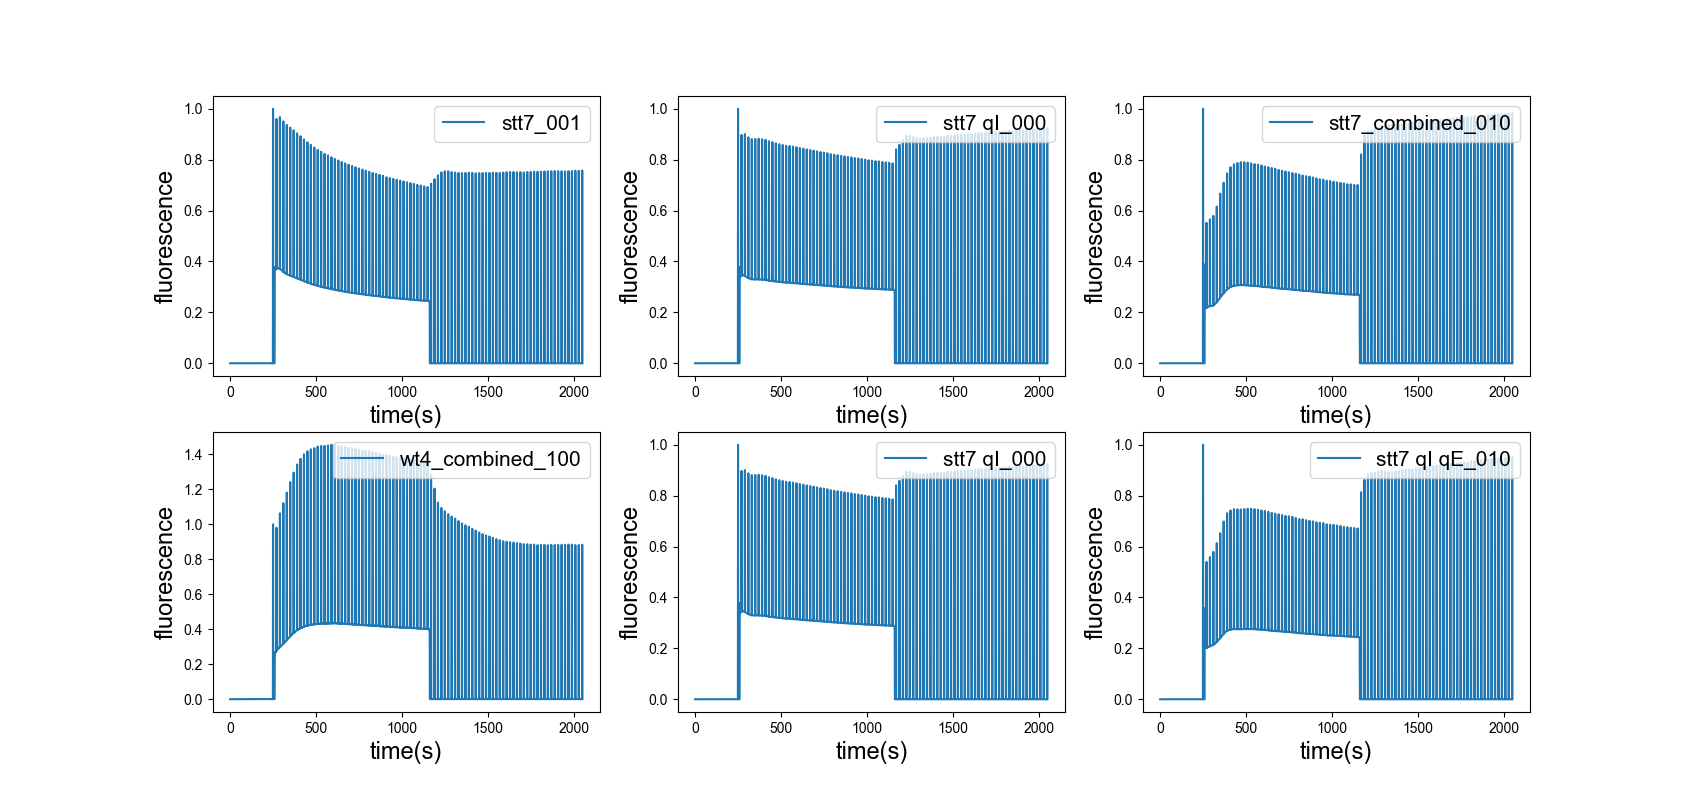

In [51]:
fig, axs = plt.subplots(2,3,figsize=(17,8))
axs = axs.flatten()
mean_traces = []
d = [0, 0, 1, 0, 0, 1]
dd = [0, -1, -1, 0, -1, -1]
for j, i in enumerate([0, 1, 2, 3, 4, 5]):
    elem = exp_set[i]
    m = elem.means(elem.measure[d[j]])[dd[j]]
    mean_traces.append(m)
    axs[j].plot(m/m[250], label = exp_description[i])
    axs[j].set_xlabel("time(s)", fontsize=g.fontsize)
    axs[j].set_ylabel("fluorescence", fontsize=g.fontsize)
    axs[j].legend(prop={"size":15}, loc=1)
    
plt.savefig("4_types_mean_traces.pdf")

In [52]:
if False: 
    #fig, axs = plt.subplots(2,3,figsize=(17,8))
    #axs = axs.flatten()
    d = [0, 0, 1, 0, 0, 1]
    dd = [0, -1, -1, 0, -1, -1]
    g.fonttick = 15
    for j, i in enumerate([0, 1, 2, 3, 4, 5]):
        elem = exp_set[i]
        m = elem.means(elem.measure[d[j]])[dd[j]]
        m = m[250::20]
        fig = g.set_figure("%d", "%d")
        plt.plot(m, label = exp_description[i])

        #axs[j].plot((m[0]-m)/m, label = exp_description[i])
        plt.xlabel("time (s)", fontsize=g.fontsize)
        plt.ylabel("$F_m$", fontsize=g.fontsize)
        plt.ylim(0, 1.2*m.max())
        #plt.legend(prop={"size":17}, loc=1)
    #plt.savefig("4_types_mean_traces.pdf")

In [53]:
if False: ## ONLY SP
    fig, axs = plt.subplots(2,2,figsize=(15,10))
    axs = axs.flatten()
    d = [1, 1, 0, 0]
    dd = [-1, -1, -1, -1]
    g.fonttick = 15
    for j, i in enumerate([2, 5, 1, 4]):
        elem = exp_set[i]
        m = elem.means(elem.measure[d[j]])[dd[j]]
        m = m[250::20]
        t = np.linspace(0, 20*len(m), len(m))
        axs[j].plot(t, m, label = ["qE, no qT", "qE, qT", "no qE, no qT", "no qE, qT"][j] )

        #axs[j].plot((m[0]-m)/m, label = exp_description[i])
        axs[j].set_xlabel("time (s)", fontsize=g.fontsize)
        axs[j].set_ylabel("$F_m$", fontsize=g.fontsize)
        axs[j].set_ylim(0, 1.2*m.max())
        axs[j].legend(prop={"size":17}, loc=1)
    #plt.savefig("4_types_mean_traces.pdf")

In [54]:
np.save("positions_to_keep.npy", positions_to_keep)

In [55]:
if False: ###DEAD ALGAE 
    fig, axs = plt.subplots(3,3, figsize=(15,10))
    axs = axs.flatten()
    d = [1, 1, 0, 0]
    dd = [-1, -1, -1, -1]
    g.fonttick = 15
    elem = exp_set[17]
    traces, blah = elem.get_traces(elem.measure[0][:1])
    for i, x in enumerate(traces[5:9]):
        m = x#[250::20]
        axs[i].plot(m, label = "algae %d"%i)
        #axs[i].legend(prop={"size":10})
        axs[i].axis("off")
    #plt.savefig("4_types_mean_traces.pdf")

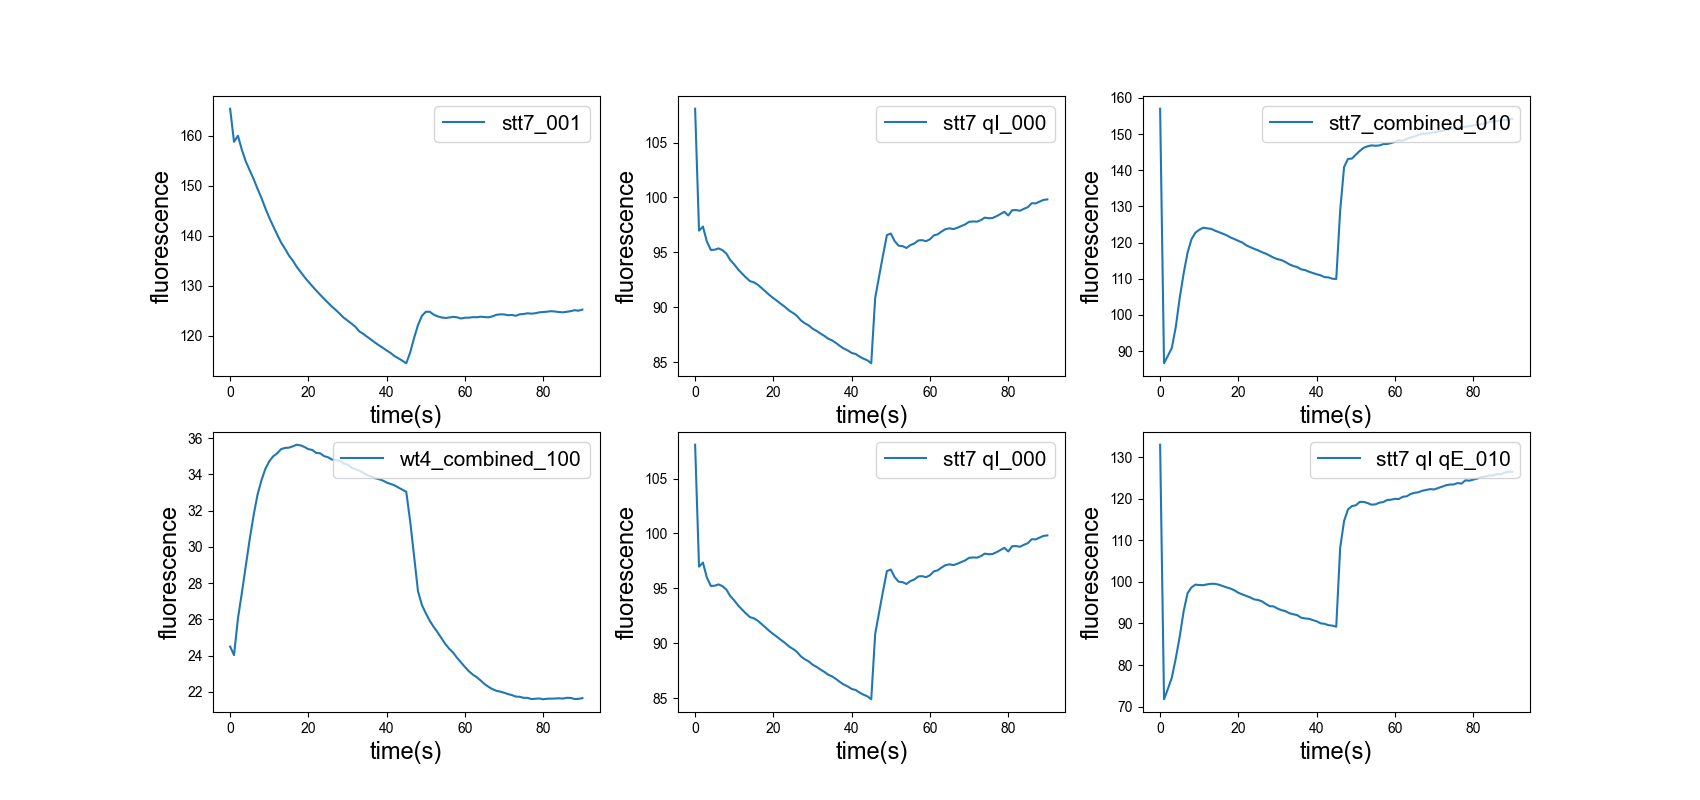

In [56]:
fig, axs = plt.subplots(2,3,figsize=(17,8))
axs = axs.flatten()
d = [0, 0, 1, 0, 0, 1]
dd = [0, -1, -1, 0, -1, -1]
for j, i in enumerate([0, 1, 2, 3, 4, 5]):
    elem = exp_set[i]
    m = elem.means(elem.measure[d[j]])[dd[j]]
    m = m[250::20]
    
    axs[j].plot(m, label = exp_description[i])

    #axs[j].plot((m[0]-m)/m, label = exp_description[i])
    axs[j].set_xlabel("time(s)", fontsize=g.fontsize)
    axs[j].set_ylabel("fluorescence", fontsize=g.fontsize)
    axs[j].legend(prop={"size":15}, loc=1)
plt.savefig("4_types_mean_traces.pdf")

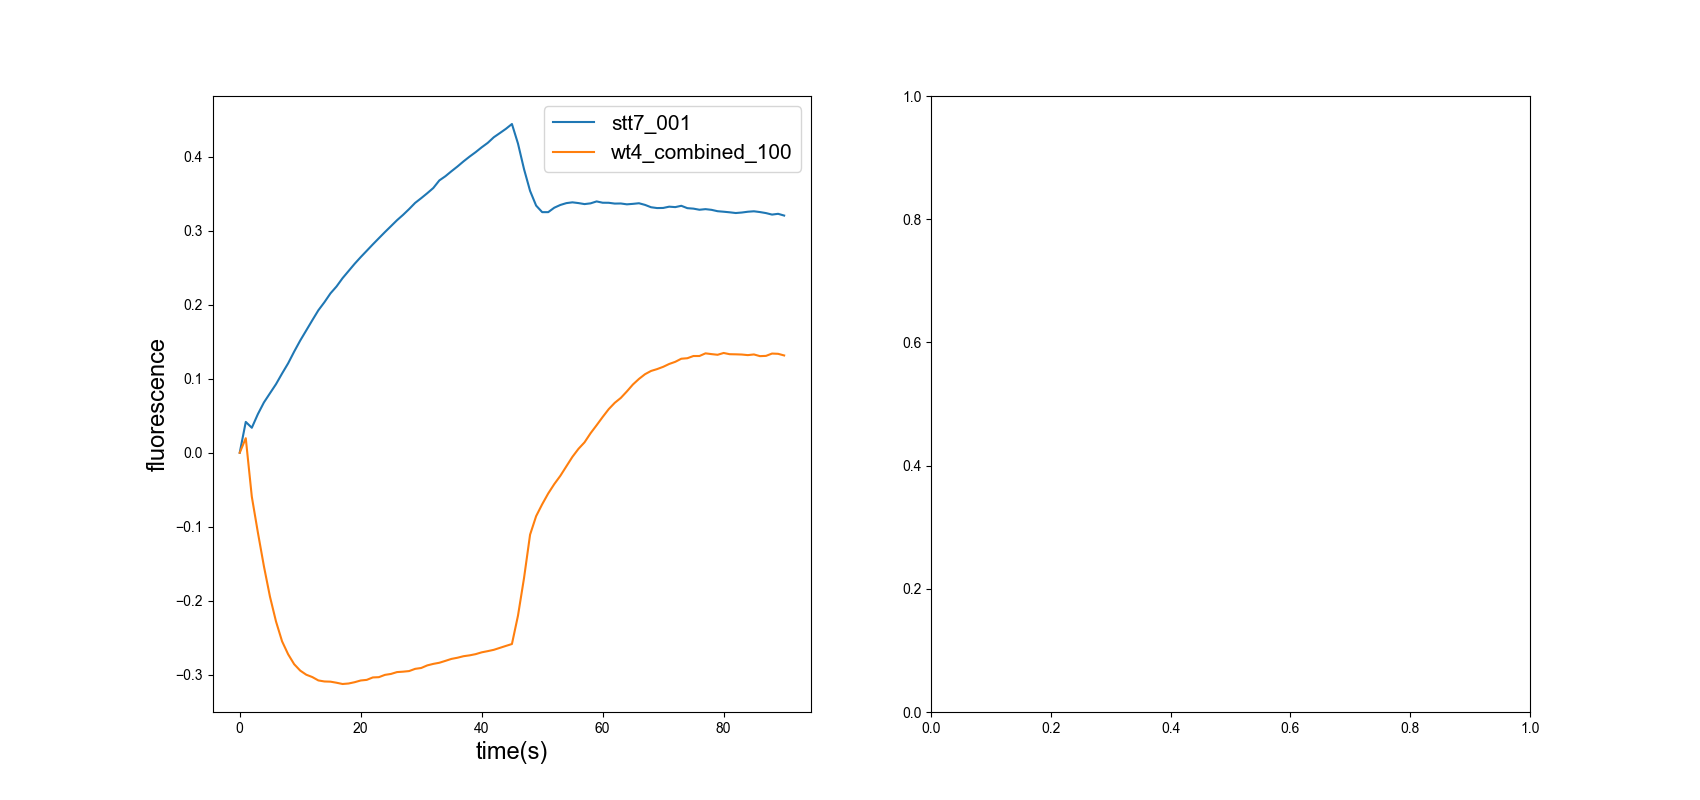

In [57]:
fig, axs = plt.subplots(1, 2,figsize=(17,8))
axs = axs.flatten()
d = [0, 0]
dd = [0, 0]
for j, i in enumerate([0, 3]):
    elem = exp_set[i]
    m = elem.means(elem.measure[d[j]])[dd[j]]
    m = m[250::20]
    axs[0].plot((m[0]-m)/m, label = exp_description[i])
    axs[0].set_xlabel("time(s)", fontsize=g.fontsize)
    axs[0].set_ylabel("fluorescence", fontsize=g.fontsize)
    axs[0].legend(prop={"size":15}, loc=1)
    
plt.savefig("4_types_mean_traces.pdf")

In [58]:
for i, exp in enumerate(exp_description):
    print(i, exp)

0 stt7_001
1 stt7 qI_000
2 stt7_combined_010
3 wt4_combined_100
4 stt7 qI_000
5 stt7 qI qE_010
6 wt4 qI qT_100
7 wt4 qI qE qT_110
8 wt222 qT_101
9 wt222 qI qT_100
10 wt222 qI qE qT_110
11 wt222 OLD qI qE qT_110
12 wt4-2H ENS not activated_000
13 wt4-mix
14 CC_124 activated IBPC_110_
15 npq4 IBPC_110
16 stt71 IBPC_100
17 wt4 IBPC_110
18 stt7-45min ENS_000
19 wt4-2H ENS not activated_100
20 wt4-2H ENS activated_110
21 wt4-4H-monoclonal_synchro_110
22 stt7-4H-monoclonal_synchro_100
23 stt7-scl3-4H-monoclonal_synchro_100
24 CC_124_ENS_test1_110
25 CC_124_ENS_test1_noact_100
26 CC_124_ENS_test1_noqInoact_101
27 CC_124_ENS_test2_110
28 WT4 not sync_110
29 WT4 slow_ind_100
30 mix long_activation_110
31 npq4_chuncks_110
32 stt7-1_chuncks_100
33 npq4 4H activation_100
34 wt222 qI qT_100
35 CC_124_ENS_test2_110
36 CC_124_0H_100
37 CC_124_2H_110
38 CC_124_2H_110
39 CC_124_1_3H_110
40 CC_124_1_3H_110
41 CC_124_1_3H_110
42 CC_124_1_3H_110
43 CC_124_1_3H_15_110


In [59]:
selected_classes = [0, 1, 2, 3]

ref = np.ones(all_data.shape[0])* -1
c =  np.concatenate(class_set)
for ind in selected_classes:
    ref += c == ind
    

database = select_couples(positions_to_keep, all_data)

all_couples = couple_set

index = select_couples(positions_to_keep, all_couples)

all_classes = np.concatenate(class_set)
all_strains = np.concatenate(strain_set)
all_descriptions = np.concatenate(description_set)

indices2 = np.linspace(0, len(all_classes)-1, len(all_classes)).astype(int)

all_classes = np.expand_dims(all_classes, 0)
all_strains = np.expand_dims(all_strains, 0)
all_descriptions = np.expand_dims(all_descriptions, 0)

database2 = np.concatenate([database.T, all_strains, all_classes], axis = 0)

data = database2[:,ref==0]
indices = indices2[ref==0]
indices = np.linspace(0, data.shape[1]-1, data.shape[1]).astype(int)



train size : (976, 38)
validation size : (10, 38)
test size : (10, 38)
(976, 3)
LDA components:
LDA explained variance:
Best score for training data: 0.9754107796964941 

Best C: 100 

Best Kernel: rbf 

Best Gamma: 0.001 

training accuracy: 0.9825819672131147
validation accuracy: 1.0


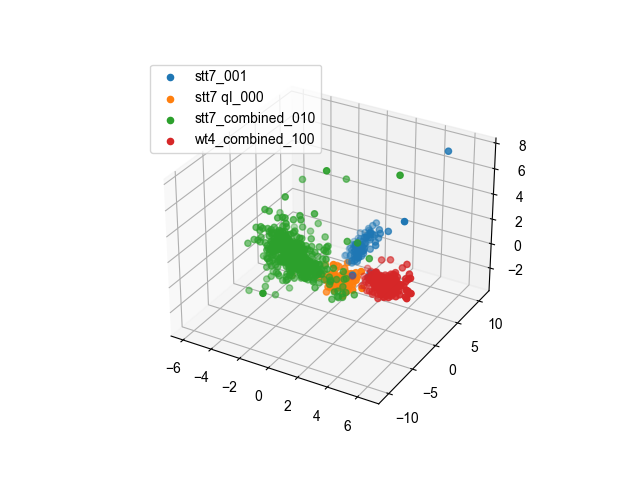

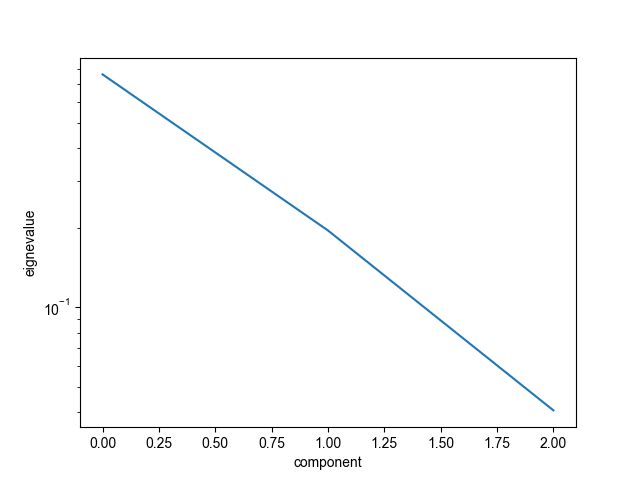

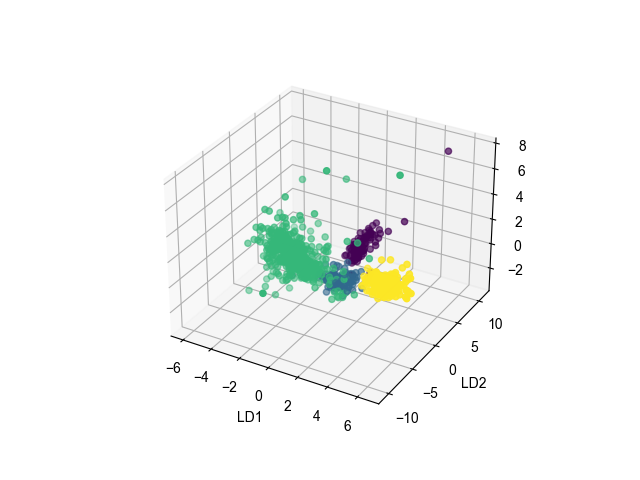

In [60]:


train, test, train_indices, test_indices = sklearn.model_selection.train_test_split(data.T, indices, test_size = 0.01)#, random_state = 1) #always generate the same test set
train, validation, train_indices, validation_indices = sklearn.model_selection.train_test_split(train, train_indices, test_size = 0.01)
print("train size :", train.shape)
print("validation size :", validation.shape)
print("test size :", test.shape)


train_set = train[:,:-2]
validation_set = validation[:,:-2]
train_classes =  train[:,-1]
validation_classes= validation[:,-1] 
labels = train[:,-2]
lda, M_lda, S_lda = make_lda(train.shape[1]-3, train_set, train_classes)
pk.dump(lda, open("lda.pkl","wb"))




fig = plt.figure()
ax = fig.add_subplot(projection='3d')
mean_pos = []
for label in np.unique(train_classes):
    ind = data.T[train_indices, -1] == label
    X = lda.transform((train_set[ind]- M_lda)/S_lda)
    description = all_descriptions[0,train_indices][ind][0]
    mean_pos.append(np.mean(X[:,:3], axis = 0))
    ax.scatter(X[:, 0], X[:, 1], X[:,2], label = description)##

plt.legend()
M_svm = np.mean(train_set, axis = 0)
S_svm = np.std(train_set, axis = 0)
train_svm = (train_set - M_svm)/S_svm
validation_svm = (validation_set - M_svm)/S_svm
final_model = make_svm(train_svm, train_classes)


pred = final_model.predict(validation_svm)
print("validation accuracy:", np.mean(pred==validation_classes))
plt.show()



In [61]:
select = abs(X - np.mean(X, axis = 0)) < 2 * np.std(X, axis = 0)
select= select.max(axis = 1)
select.shape

(216,)

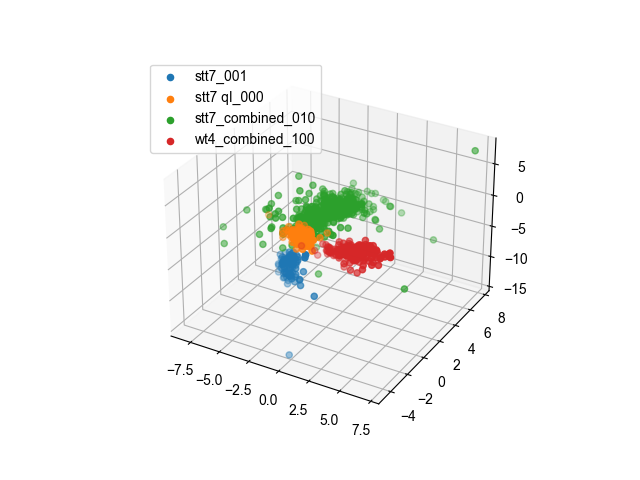

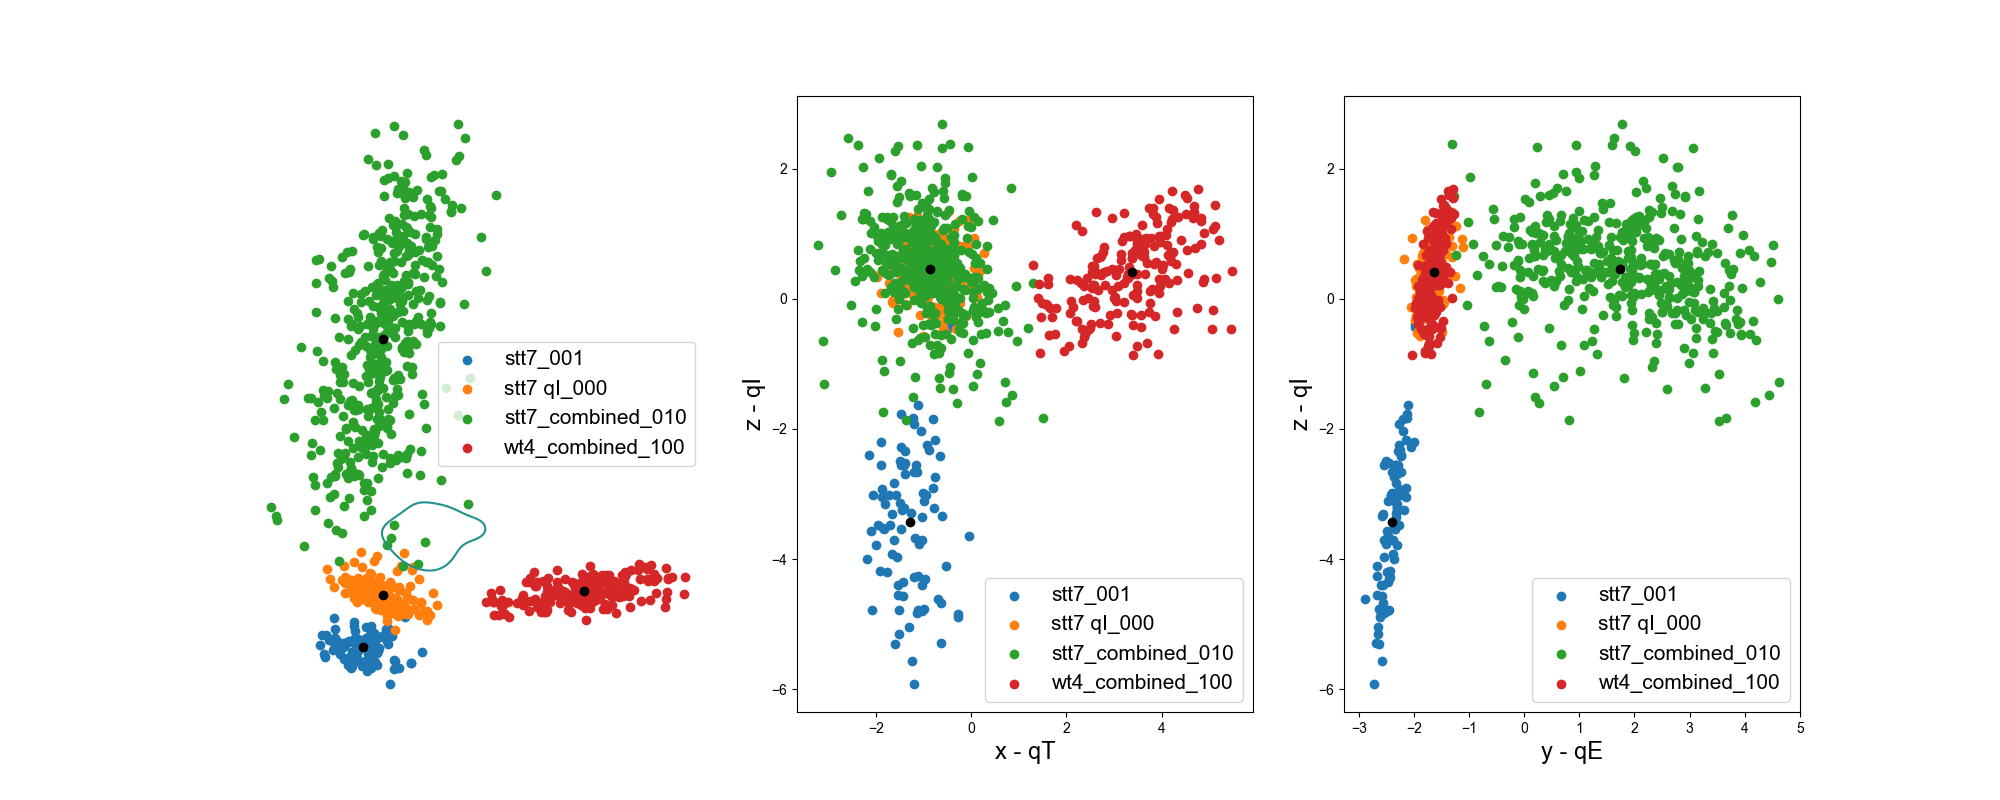

In [62]:
ax0 = mean_pos[3] - mean_pos[1]
ax1 = mean_pos[2] - mean_pos[1]
ax0 = ax0/np.linalg.norm(ax0)
ax1 = ax1/np.linalg.norm(ax1)
ax2 = np.cross(ax0, ax1)

B = np.array([ax0, ax1, ax2]).T

R = np.linalg.inv(B)

Tr = lda.scalings_[:,:3]
RTr= np.dot(R, Tr.T)

def transform_data(data, transform):
    #print(data.shape, transform.shape)
    data = (data.T - M_lda)/S_lda
    XT = np.dot(data, transform.T)
    
    return XT

np.savetxt("M_lda.csv",M_lda)
np.savetxt("S_lda.csv",S_lda)
np.savetxt("RTr.csv", RTr)

kk=13
for i in [25]: #range(31):
    selected_classes = [0, 1, 2, 3]#,36,37,38, 39, 40, 41]
    ref = np.ones(all_data.shape[0])* -1
    c =  np.concatenate(class_set)
    for ind in selected_classes:
        ref += c == ind


    VV = 10

    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    fig2, ax2 = plt.subplots(1, 3, figsize = (20, 8))
    labels = database2[-1]
    data = database2[:-2]

    XT =  transform_data(data, RTr)

    lower_bounds = np.quantile(XT, 0.019, axis = 0)
    upper_bounds = np.quantile(XT, 0.99, axis = 0)

    for label in selected_classes:
        ind = labels == label
        XT =  transform_data(data, RTr)
        X = XT[ind]
        description = all_descriptions[0][ind][0]

        ax.scatter(X[:, 0], X[:, 1], X[:,2], label = description)##
        select = abs(X - np.mean(X, axis = 0)) < 2 * np.std(X, axis = 0)
        select = select.min(axis = 1)

        ax2[0].scatter(X[select,0], X[select,1], label = description)
        ax2[0].scatter(np.mean(X[select,0]), np.mean(X[select,1]), color = "k")

        ax2[0].set_xlabel('x - qT', fontsize=17)
        ax2[0].set_ylabel('y - qE', fontsize=17)
        #ax2[0].set_xlim(lower_bounds[0], upper_bounds[0])
        #ax2[0].set_ylim(lower_bounds[1], upper_bounds[1])

        ax2[1].scatter(X[select,0], X[select,2], label = description)
        ax2[1].scatter(np.mean(X[select,0]), np.mean(X[select,2]), color = "k")

        ax2[1].set_xlabel('x - qT', fontsize=17)
        ax2[1].set_ylabel('z - qI', fontsize=17)
        #ax2[1].set_xlim(lower_bounds[0], upper_bounds[0])
        #ax2[1].set_ylim(lower_bounds[2], upper_bounds[2])

        ax2[2].scatter(X[select,1], X[select,2], label = description)
        ax2[2].scatter(np.mean(X[select,1]), np.mean(X[select,2]), color = "k")

        ax2[2].set_xlabel('y - qE', fontsize=17)
        ax2[2].set_ylabel('z - qI', fontsize=17)
        #ax2[2].set_xlim(lower_bounds[1], upper_bounds[1])
        #ax2[2].set_ylim(lower_bounds[2], upper_bounds[2])

    ax.legend()
    ax2[0].legend(prop = {"size": 15})
    ax2[0].axis("off")
    ax2[1].legend(prop = {"size": 15})
    ax2[2].legend(prop = {"size": 15})


    import scipy.stats as st

for kk in [43]:
    ind = labels == kk
    XT =  transform_data(data, RTr)
    X = XT[ind]
    description = all_descriptions[0][ind][0]

    select = abs(X - np.mean(X, axis = 0)) < 2 * np.std(X, axis = 0)
    select = select.min(axis = 1)
    x = X[select,0]
    y =  X[select,1]

    # Define the borders
    deltaX = (max(x) - min(x))/10
    deltaY = (max(y) - min(y))/10
    xmin = min(x) - deltaX
    xmax = max(x) + deltaX
    ymin = min(y) - deltaY
    ymax = max(y) + deltaY

    # Create meshgrid
    xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
    positions = np.vstack([xx.ravel(), yy.ravel()])
    values = np.vstack([x, y])
    kernel = st.gaussian_kde(values)

    f = np.reshape(kernel(positions).T, xx.shape)


    #plt.imshow(z)

    cfset = ax2[0].contour(xx, yy, f, levels=1, alpha=1)
    #ax2[0].imshow(np.rot90(f), cmap='coolwarm', extent=[xmin, xmax, ymin, ymax])
    #cset = ax.contour(xx, yy, f, colors='k')
    #ax.clabel(cset, inline=1, fontsize=10)

plt.savefig((save_folder + "/3D_projected/3D_projected_"+ '_'.join(['%d']*len(selected_classes)) + ".png")% tuple(selected_classes))

## Components interpretation

In [63]:
for i in range(3):
    print(["qE", "qT", "qI"][i], index[np.abs(RTr[i])>0.1])


qE ['410-250' '1110-250' '1130-250' '1150-250' '1170-250' '410-270'
 '1170-270' '410-290' '1170-290' '1110-410' '1130-410' '1150-410'
 '2050-410' '1170-1110' '2050-1110' '1170-1130' '2050-1130' '1170-1150'
 '2050-1150' '2050-1170']
qT ['270-250' '290-250' '1170-250' '410-270' '1110-270' '1130-270' '1150-270'
 '1170-270' '2050-270' '410-290' '1110-290' '1130-290' '1150-290'
 '2050-290' '2050-1170']
qI ['270-250' '290-250' '1110-250' '1130-250' '1150-250' '1170-250'
 '2050-250' '2050-270' '410-290' '1110-410' '1130-410' '1150-410'
 '1170-410' '2050-410' '2050-1110' '2050-1130' '2050-1150' '2050-1170']


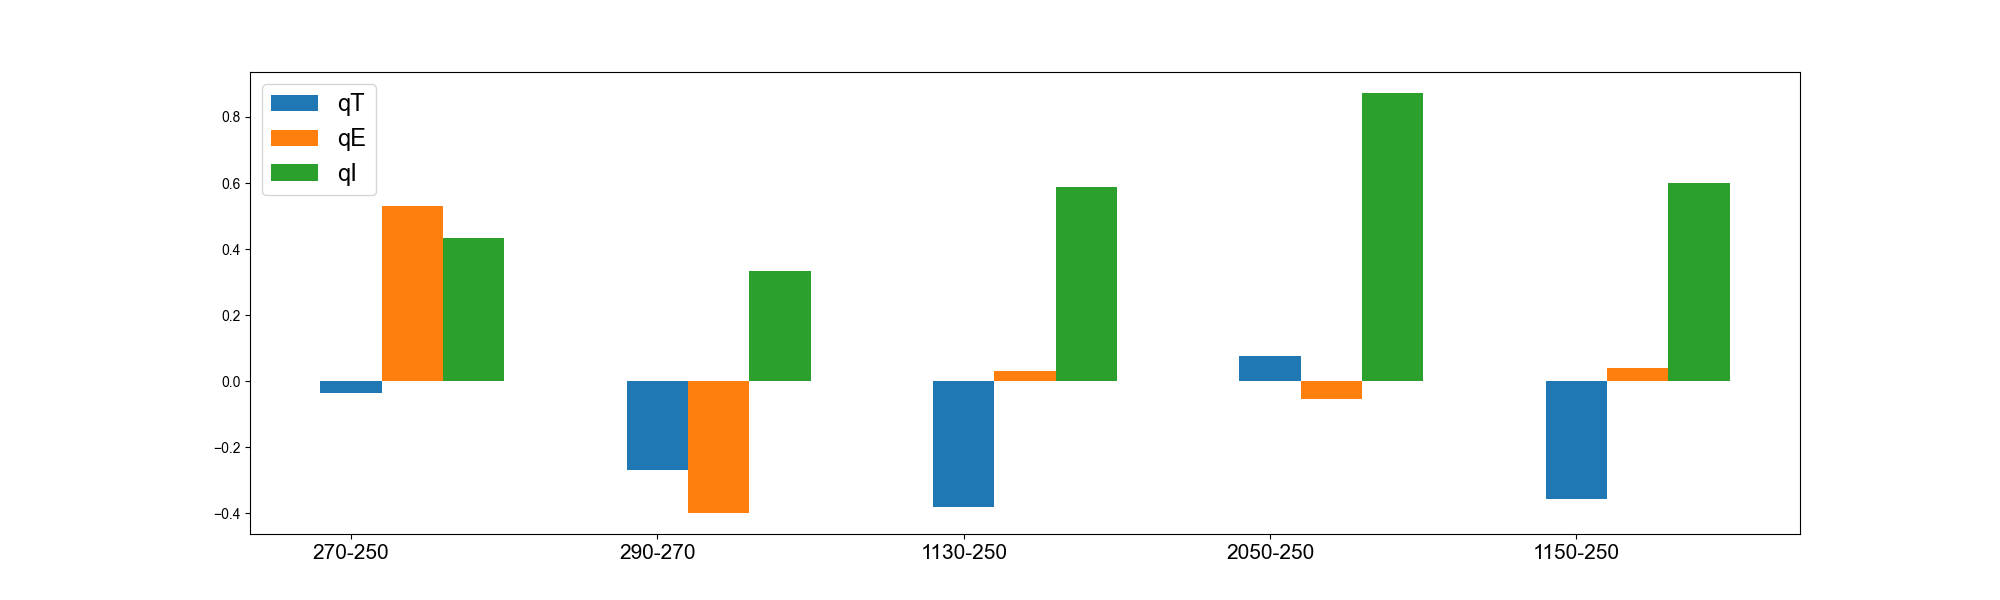

In [64]:
plt.figure(figsize = (20, 6))

couples = np.array(["270-250", "290-270", "1130-250", "1190-1170", "2050-250", "1190-250", "1190-1150", "1150-250", "1190-1130", "1190-270"])
val = []
kept_couples = []
R2 = np.copy(RTr)
R2[-1] = -R2[-1]
for couple in couples:
    v = R2[:,index==couple]
    v = v/np.sum(np.abs(v))
    if np.array(v).shape[1]!=0:
        kept_couples.append(couple)
        val.append(v)
val = np.array(val)
val = val[:,:,0].T
for i in range(3):
    X_axis = np.arange(len(kept_couples))

    plt.bar(X_axis + 0.2*i,val[i], 0.2, label = ["qT", "qE", "qI"][i])

    plt.xticks(X_axis, kept_couples, fontsize = 15) 
plt.legend(prop={"size":17})

ValueError: operands could not be broadcast together with shapes (2052,) (0,) 

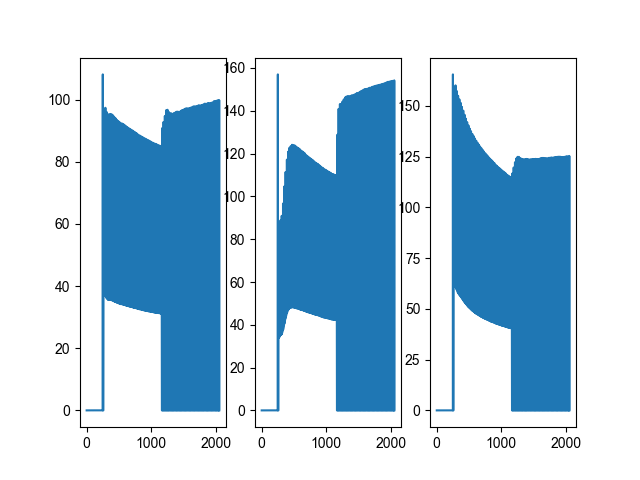

In [65]:

couples = np.array(["270-250", "290-250", "290-270", "450-290", "1190-270", "1190-1130", "1190-1170", "2050-250", "1190-250", "1190-1150", "1150-250", "1210-1170"])
val = []
eq = [4, 2, 0]
fig, axs = plt.subplots(1, 3)
for x, j in enumerate(eq):
    axs[x].plot(mean_traces[j])
for couple in couples:
    pos_couple = [int(pos) for pos in couple.split('-') if pos.isdigit()]
    vec = RTr[:,index==couple]
    mlda = M_lda[index==couple]
    slda = S_lda[index==couple]
    for i in range(3):
        m = (mean_traces[eq[i]]-mlda)/slda
        vec[i] = vec[i] *  np.abs(m[pos_couple[0]] - m[pos_couple[1]])
    val.append(vec)
val = np.array(val)
val = val[:,:,0].T
plt.figure(figsize = (20, 6))

for i in range(3):
    X_axis = np.arange(len(couples))

    plt.bar(X_axis + 0.2*i,val[i], 0.2, label = ["qT", "qE", "qI"][i])

    plt.xticks(X_axis, couples, fontsize = 15) 
plt.legend()

In [ ]:
STOP =15

loc = {}
loc_couple = {}
ampl = {}
ampl_corrected = {}

plt.figure(figsize = (25, 6))
eq = [4, 2, 0]
for i in range(3):
    M = np.max(np.abs(RTr), axis = 1)
    M = np.expand_dims(M, 1)
    ref = np.mean(np.abs(RTr)/M, axis = 0)
    position = np.argsort(ref)
    ampl_couple = RTr[i][position][::-1][:STOP]
    ampl[i] = ampl_couple
    couple = index[position][::-1][:STOP]
    loc_couple[i] = couple

    loc[i] = []
    ampl_corrected[i] = []
    for k, couple in enumerate(couple):
        pos_couple = [int(pos) for pos in couple.split('-') if pos.isdigit()]
        loc[i].append(pos_couple)
        m = mean_traces[eq[i]]
        A = ampl_couple[k] *  np.abs(m[pos_couple[1]] - m[pos_couple[0]])
        ampl_corrected[i].append(A)
    loc[i] = np.array(loc[i])
    ampl_corrected[i] = np.array(ampl_corrected[i])

        
    X_axis = np.arange(len(loc_couple[i]))

    plt.bar(X_axis + 0.2*i, ampl_corrected[i], 0.2, label = ["qT", "qE", "qI"][i])

    plt.xticks(X_axis, loc_couple[i], fontsize = 15) 

plt.legend(prop={"size":14})

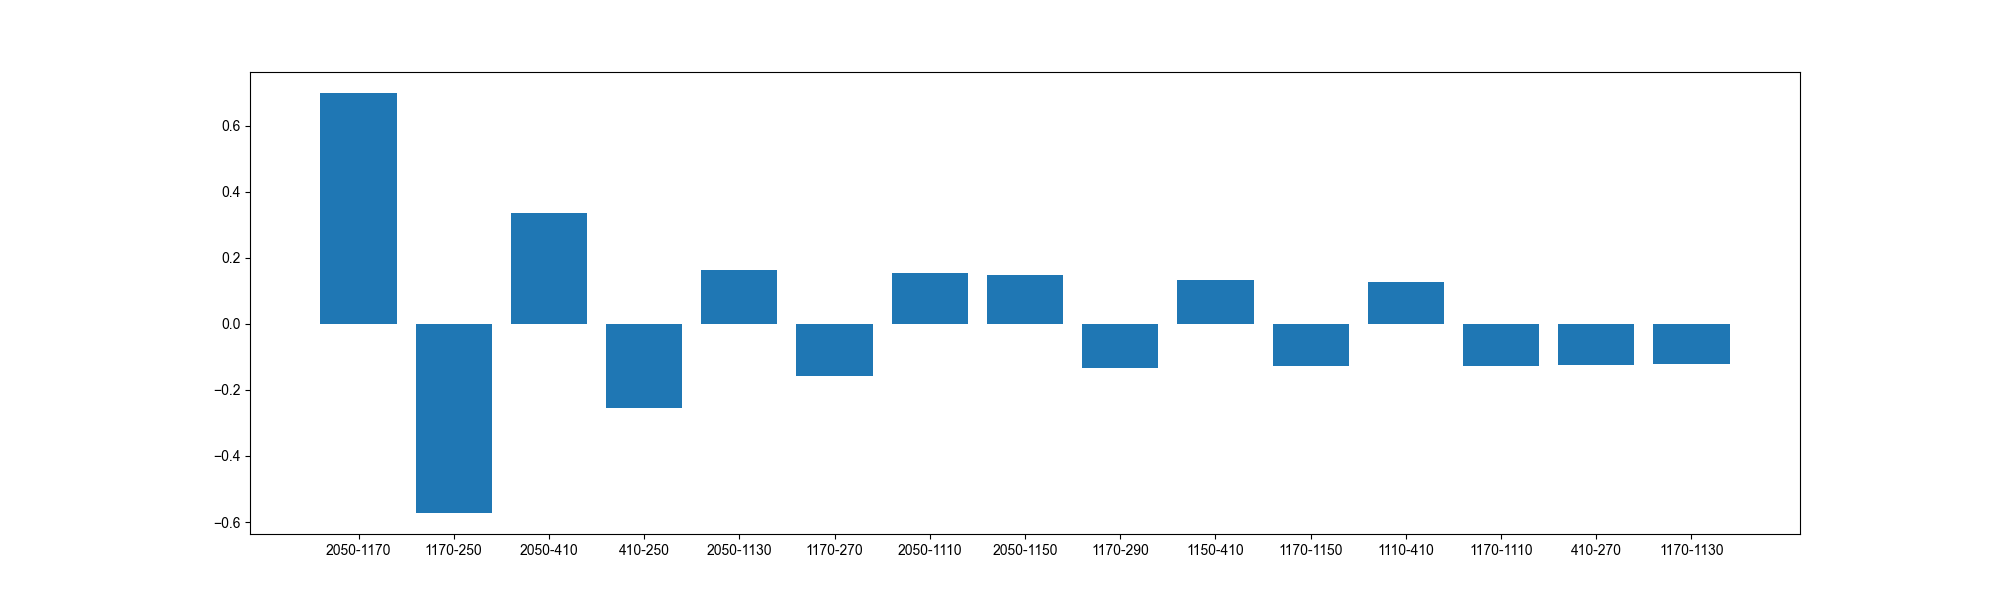

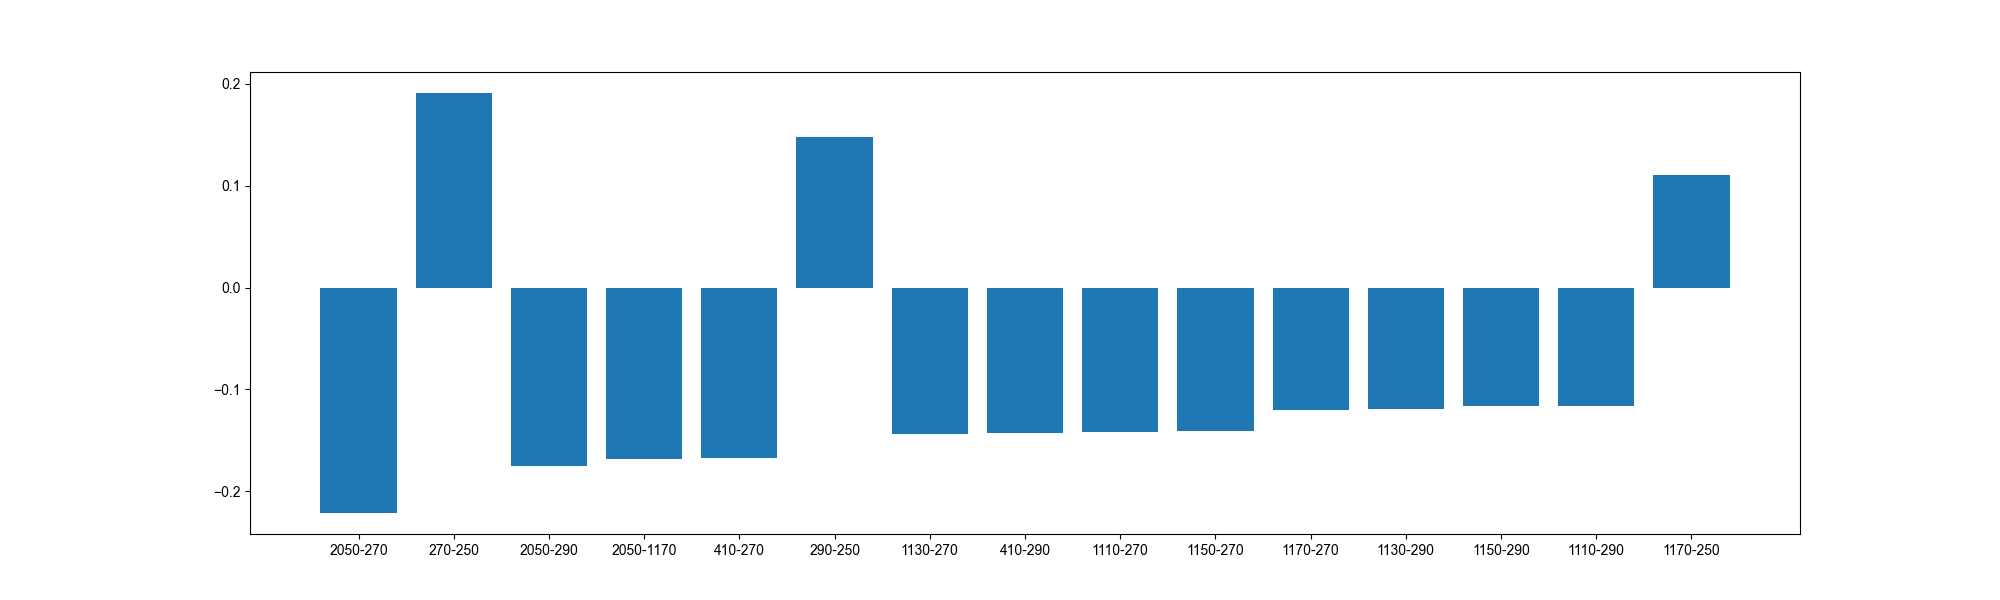

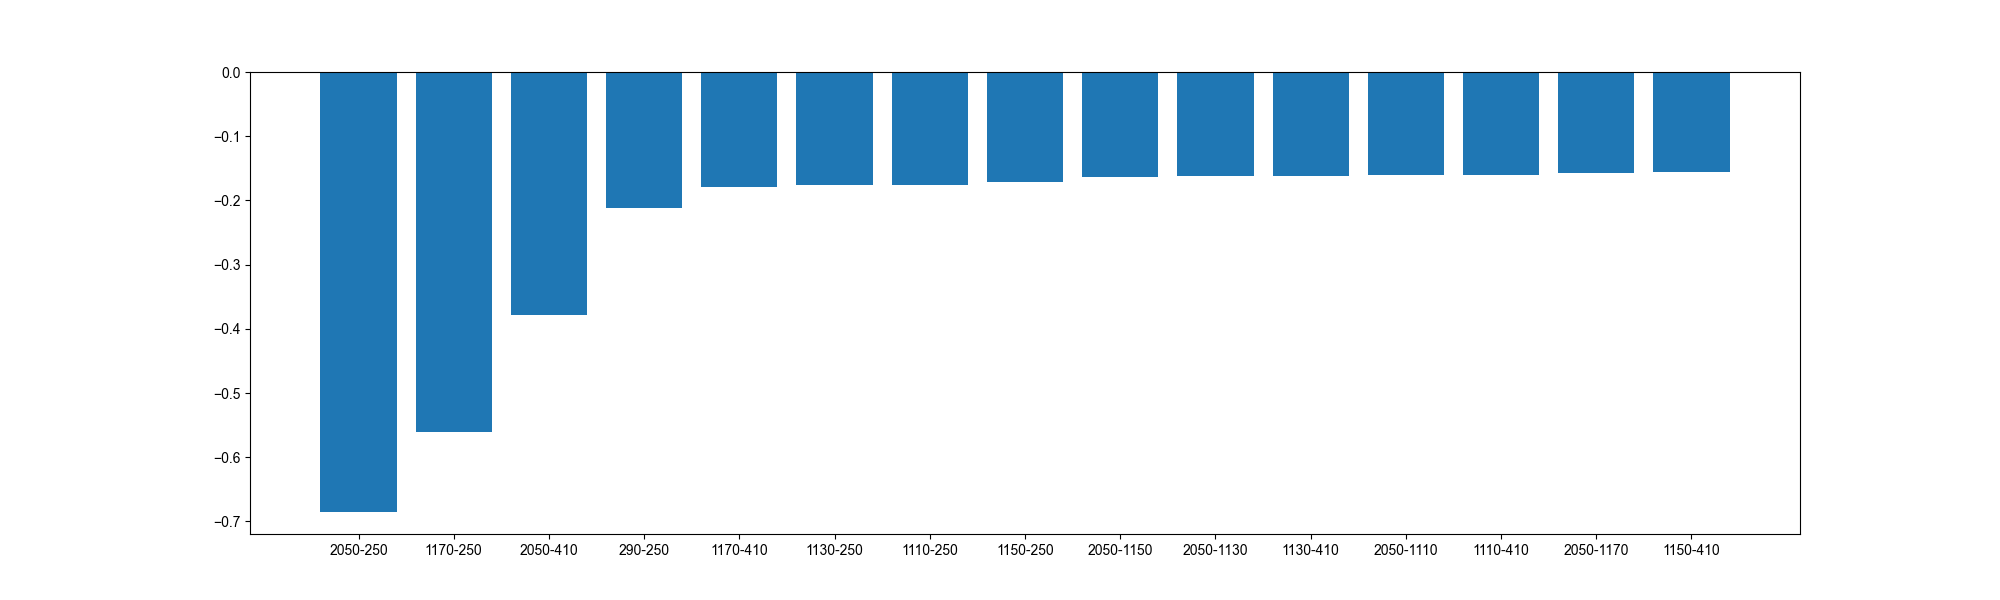

In [66]:
STOP =15

loc = {}
loc_couple = {}
ampl = {}

for i in range(3):
    position = np.argsort(np.abs(RTr[i]))
    ampl_couple = RTr[i][position][::-1][:STOP]
    ampl[i] = ampl_couple
    couple = index[position][::-1][:STOP]
    loc_couple[i] = couple

    loc[i] = []

    for couple in couple:
        loc[i].append([int(pos) for pos in couple.split('-') if pos.isdigit()])
    loc[i] = np.array(loc[i])
    plt.figure(figsize = (20, 6))
    plt.bar(loc_couple[i], ampl[i])

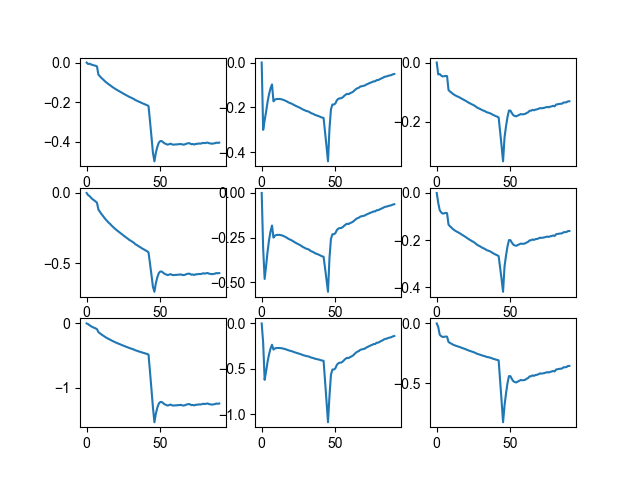

In [67]:
fig, axs = plt.subplots(3,3)

bases = []
base = np.zeros(2051)
for i, u  in enumerate([2, 1, 0]):
    for k, v in enumerate([0, 2, 4]):
        for j, couple in enumerate(loc[u]):
            trace = np.mean(traces_qE_set[v],axis = 0)
            base[couple[1]] =  base[couple[0]] - ampl[u][j]

        b = np.cumsum(base[250::20])*trace
        if u !=0 : 
            b = -b

        axs[i,k].plot(b)
    
        

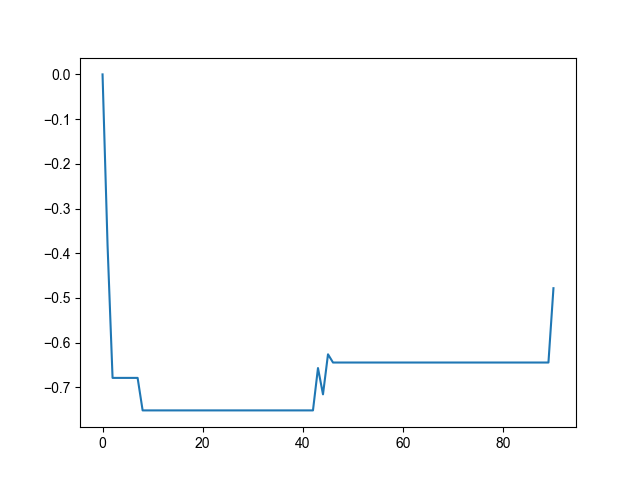

In [68]:
bases = []
base = np.zeros(2051)
for i in [2, 1, 0]:
    for j, couple in enumerate(loc[i]):
        #print(couple)
        #print(ampl[i][j])
        base[couple[0]] =  base[couple[1]] - ampl[i][j]
    b = np.cumsum(base[250::20])
    #b = base[250::20]
    if u ==2 : 
            b = -b
    plt.plot(b)
    bases.append(b)

plt.figure()
plt.plot(bases[1] + bases[2])

# correlations

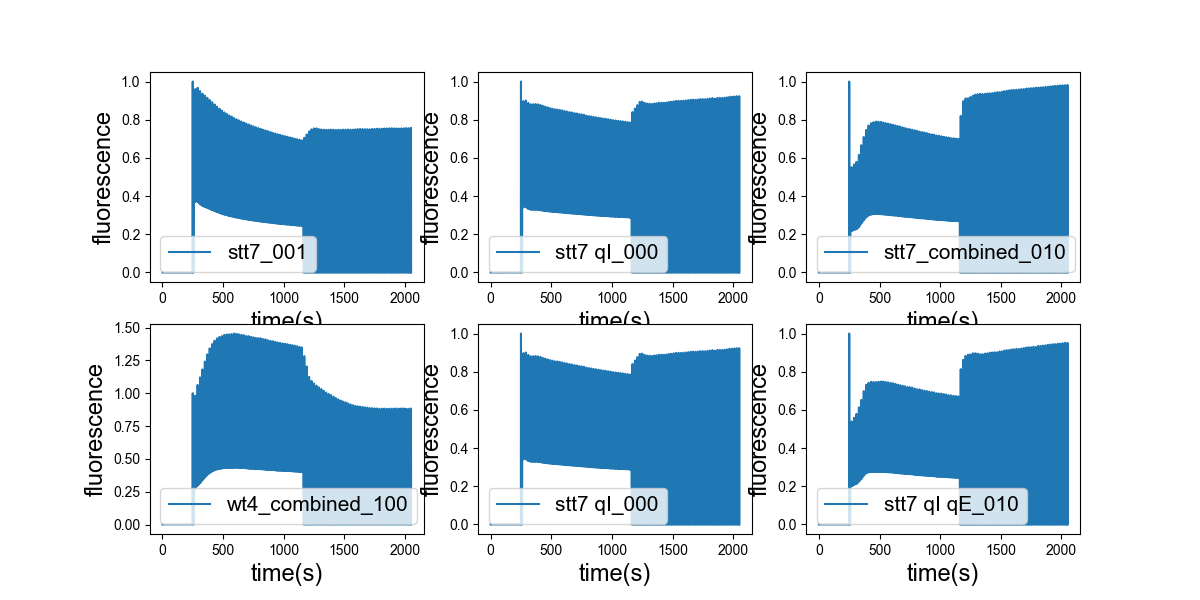

In [69]:
fig, axs = plt.subplots(2,3,figsize=(12,6))
axs = axs.flatten()
mean_traces = []
d = [0, 0, 1, 0, 0, 1]
dd = [0, -1, -1, 0, -1, -1]
for j, i in enumerate([0, 1, 2, 3, 4, 5]):
    elem = exp_set[i]
    m = elem.means(elem.measure[d[j]])[dd[j]]
    mean_traces.append(m)
    axs[j].plot(m/m[250], label = exp_description[i])
    axs[j].set_xlabel("time(s)", fontsize=g.fontsize)
    axs[j].set_ylabel("fluorescence", fontsize=g.fontsize)
    axs[j].legend(prop={"size":15}, loc=3)
    
plt.savefig("4_types_mean_traces.pdf")

C:\Users\Alienor\AppData\Local\Temp\ipykernel_13048\776812362.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[exp_description[i]][couple] = np.corrcoef(X[ind],Y[ind])[0, 1]
C:\Users\Alienor\AppData\Local\Temp\ipykernel_13048\776812362.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[exp_description[i]][couple] = np.corrcoef(X[ind],Y[ind])[0, 1]
C:\Users\Alienor\AppData\Local\Temp\ipykernel_13048\776812362.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

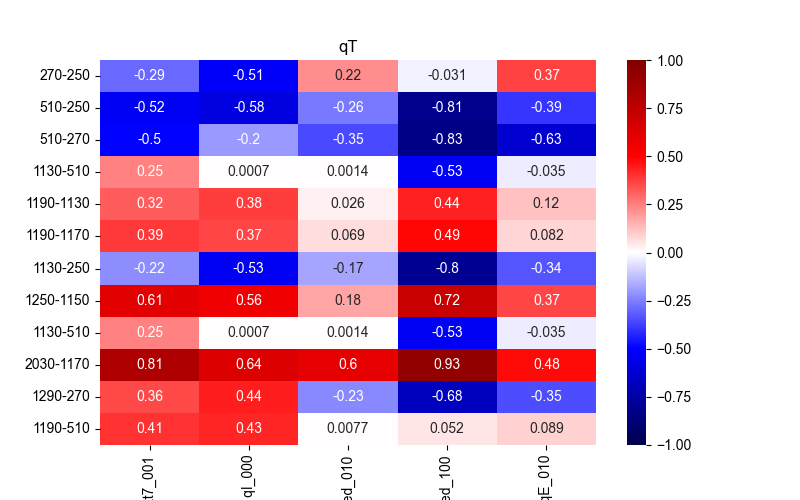

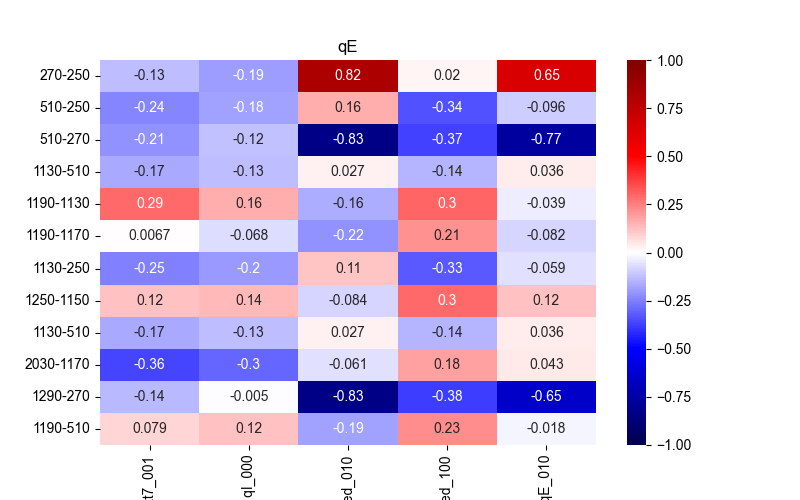

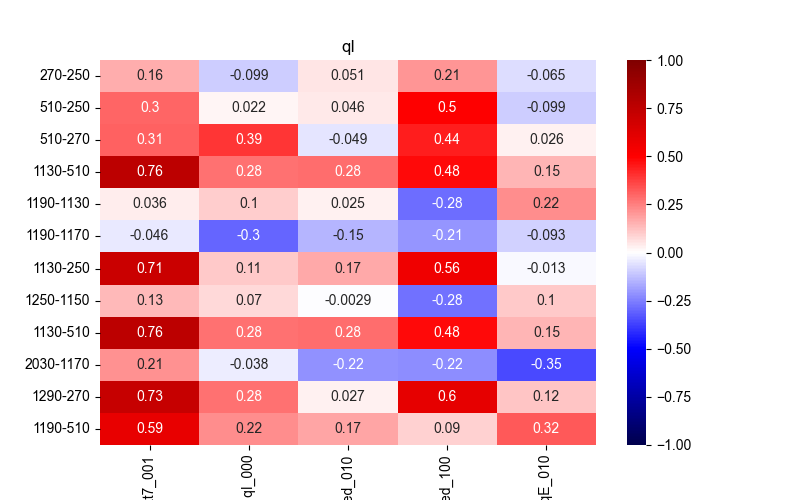

In [29]:
couples_corr =["270-250",'510-250','510-270', "1130-510", "1190-1130", "1190-1170", "1130-250", "1250-1150", "1130-510", "2030-1170", "1290-270", "1190-510"]
classes =  [0, 1, 2, 3, 4, 5]
dfs = []

for vec in [0, 1, 2]:
    init = {exp_description[i]: [0]*len(couples_corr) for i in classes  }
    df = pd.DataFrame(init, index=couples_corr)
    XT =  transform_data(data, RTr)

    for i in classes:
        for couple in couples_corr:
            p0 = all_couples==couple
            pos = (all_classes == i)[0]
            X = XT[pos, vec]
            Y = all_data[pos, p0]

            selectx = abs(X - X.mean()) < 3 * X.std()
            selecty = abs(Y - Y.mean()) < 3 * Y.std()
            ind = selectx*selecty
            df[exp_description[i]][couple] = np.corrcoef(X[ind],Y[ind])[0, 1]
    
    plt.figure(figsize=(8,5 ))
    title  = ["qT", "qE", "qI"][vec]
    plt.title(title)
    sns.heatmap(df, annot=True,cmap="seismic", vmin=-1, vmax=1)
    dfs.append(df)
    
    plt.savefig(save_folder + "correlation_coeff/correlation_coeff_" + title + '.png')


In [30]:
classes =  [4, 2, 3]
dfs = []
couples_corr = index#all_couples
for vec in [0, 1, 2]:
    init = {exp_description[i]: [0]*len(couples_corr) for i in [classes[vec]]  }
    df = pd.DataFrame(init, index=couples_corr)
    XT =  transform_data(data, RTr)
    i = classes[vec]
    for couple in couples_corr:
        p0 = all_couples ==couple
        pos = (all_classes == i)[0]
        X = XT[pos, vec]
        Y = all_data[pos, p0]

        selectx = abs(X - X.mean()) < 3 * X.std()
        selecty = abs(Y - Y.mean()) < 3 * Y.std()
        ind = selectx*selecty
        df[exp_description[i]][couple] = np.corrcoef(X[ind],Y[ind])[0, 1]

    dfs.append(df)

In [31]:
n=20
for i, df in enumerate(dfs):
    print(["qT", "qE", "qI"][i])
    k = df.keys()[0]
    #print(df.loc[df[k].abs() > [0.51, 0.48, 0.67][i]])
    print(df.abs().sort_values(df.keys()[0], ascending = False)[:n])


qT
           stt7 qI_000
1750-710      0.687347
1750-670      0.684973
1730-670      0.682268
1730-1170     0.682091
1770-710      0.681300
2030-930      0.679960
1770-670      0.679819
1750-650      0.679612
1750-630      0.678541
1750-790      0.677214
1750-770      0.676895
1970-670      0.676609
1750-690      0.676386
1730-710      0.676385
1770-530      0.676253
1790-710      0.676223
1730-790      0.675670
1730-690      0.675556
1770-470      0.675505
1750-1170     0.674968
qE
          stt7_combined_010
1370-270           0.834903
1410-270           0.834854
1390-270           0.834638
1430-270           0.834566
1530-270           0.832694
510-270            0.832026
530-270            0.831992
550-270            0.831792
490-270            0.830487
570-270            0.830416
1290-270           0.829947
1470-270           0.829255
470-270            0.828719
1350-270           0.828553
1490-270           0.827926
1450-270           0.827718
590-270            0.827619
1990-27

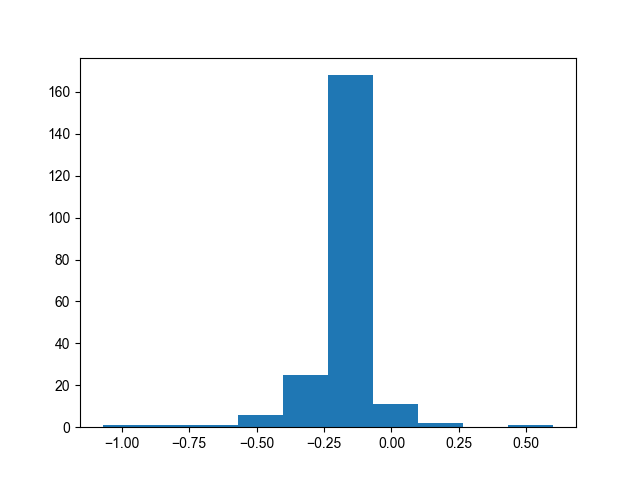

In [32]:
plt.figure()
Y0 = traces_qE_set[5][:,(2030-250)//20] - traces_qE_set[5][:,(1170-250)//20]
x = plt.hist(Y0)

trace_chelou = Y0<-0.4

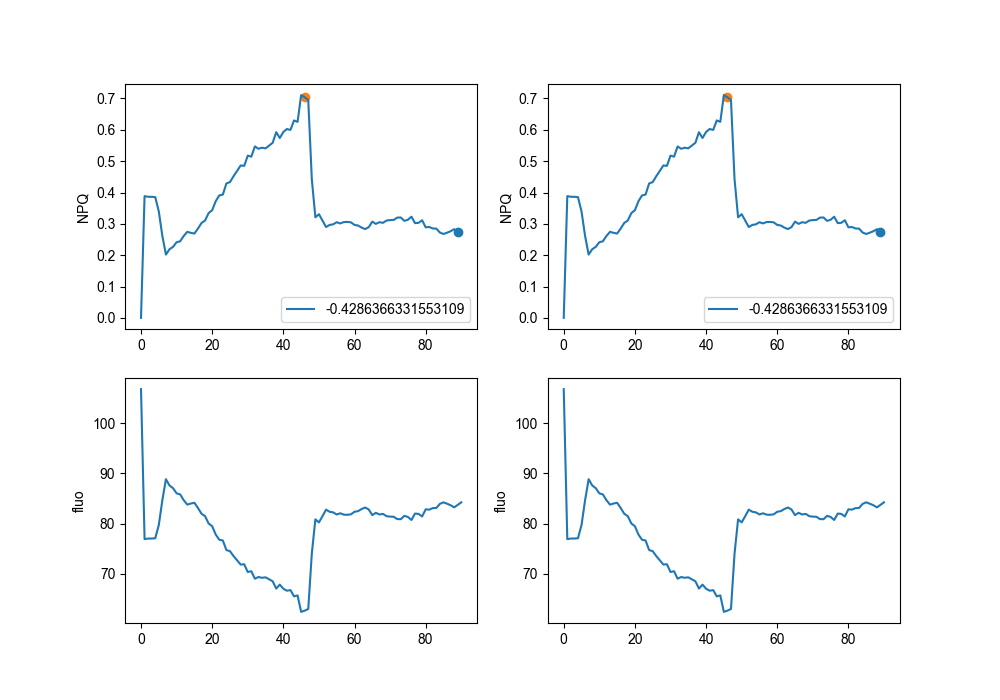

In [33]:
#couple = "1130-510"
couple = "270-250"
#couple = "510-250"
b0, b1 = 2030, 1170
couple = "%d-%d"%(b0,b1)

p0 = all_couples==couple

XT =  transform_data(data, RTr)
fig, axs = plt.subplots(2,2, figsize=(10,7))
for n, i in enumerate([5, 5]):
    y= traces_qE_set[i][trace_chelou]
    u = random.randint(0,len(y))

    a0, a1 = (b0-250)//20, (b1-250)//20
    axs[0][n].plot(y[u], label = y[u,a0]-y[u, a1])
    axs[0][n].scatter(a0, y[u][a0])
    axs[0][n].scatter(a1, y[u][a1])
    
    axs[1][n].plot(pulse_set[i][trace_chelou][u])
    axs[0][n].set_ylabel("NPQ")
    axs[0][n].legend()
    axs[1][n].set_ylabel("fluo")

stt7_001 -0.13143103831648098
stt7 qI_000 -0.1929354484391396
stt7_combined_010 0.8245512525465085
wt4_combined_100 0.020165516785961478
stt7 qI_000 -0.1929354484391396
stt7 qI qE_010 0.6525669392756365


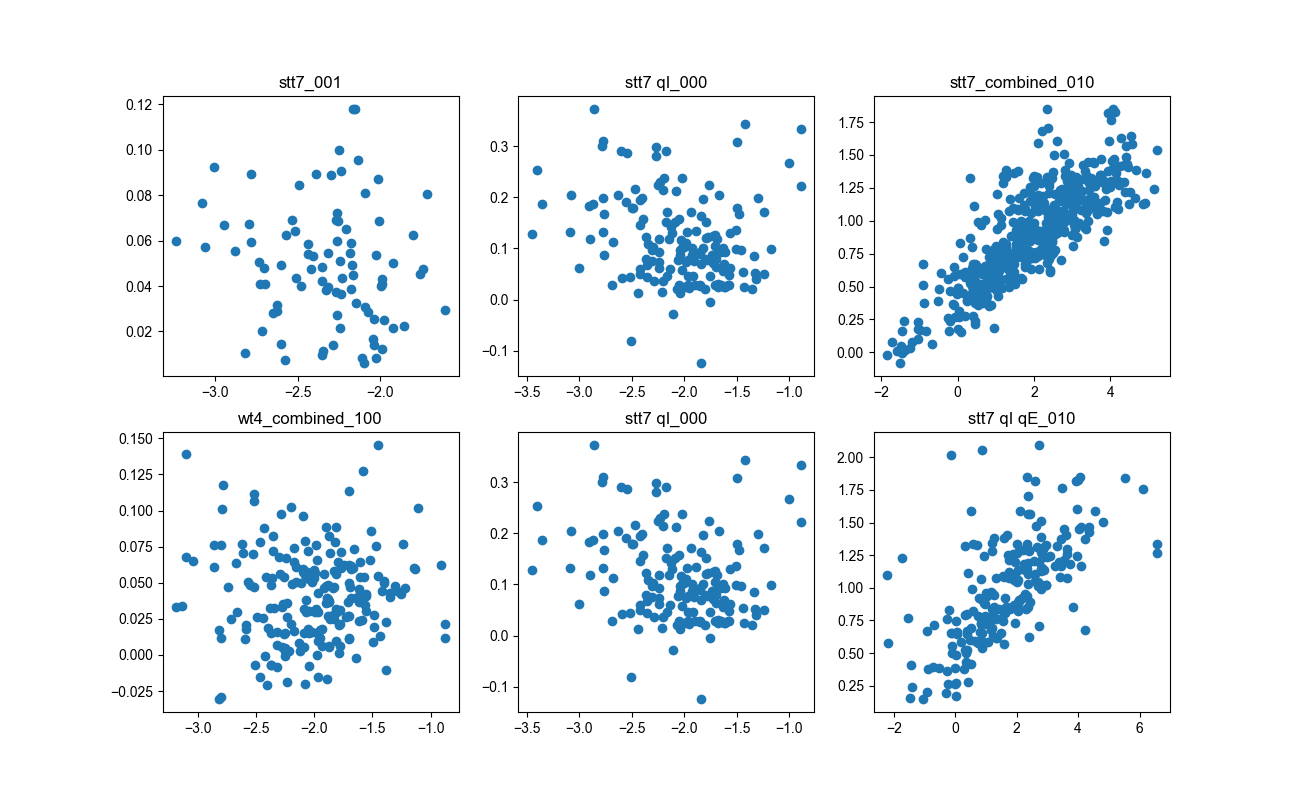

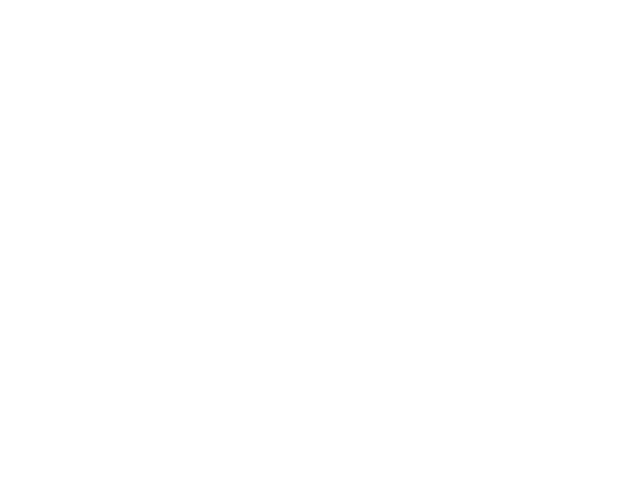

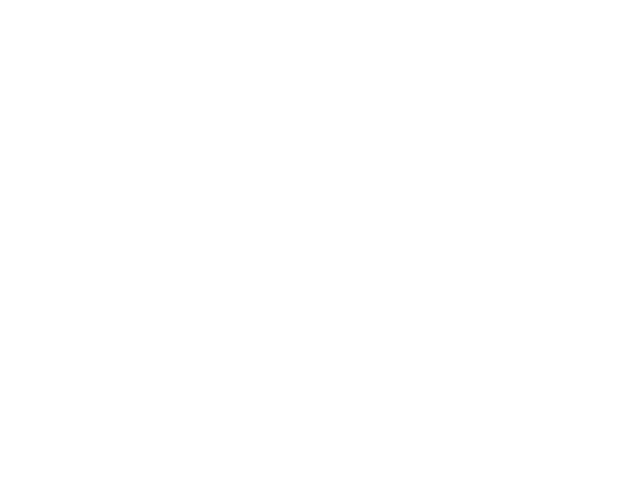

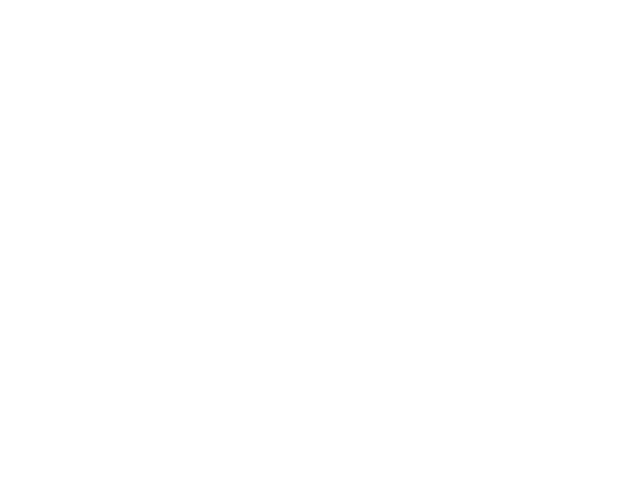

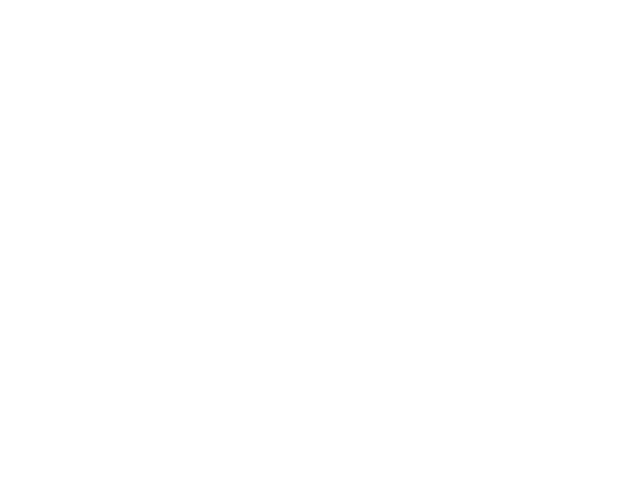

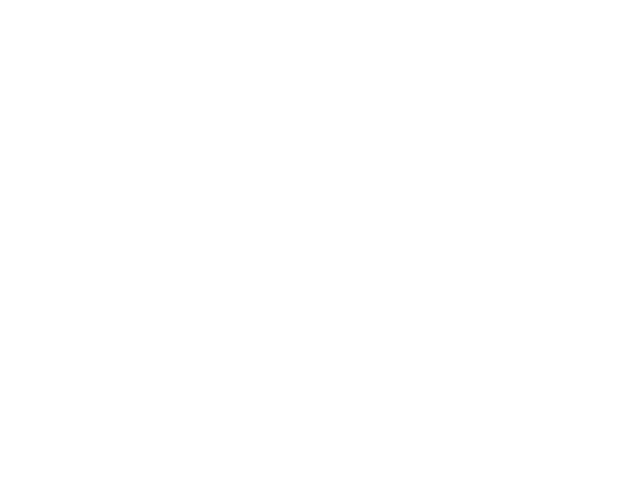

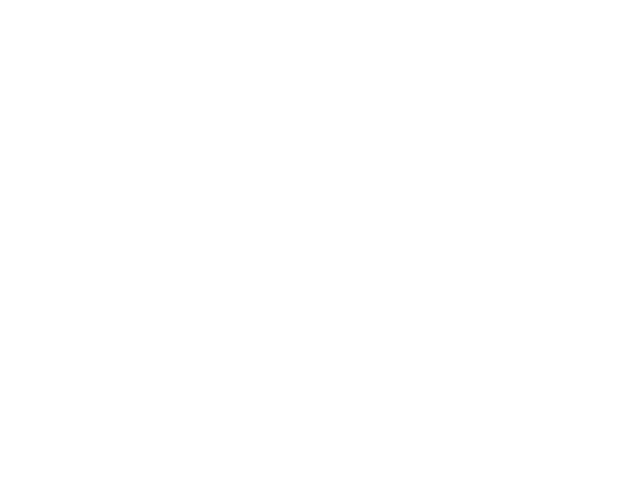

In [39]:
#couple = "1130-510"

couple = "270-250"
vec = 1

#couple = "510-250"
#vec = 0

#couple = "2050-250"
#vec = 2

#couple = "2030-1170"
#vec = 0


fig, axs = plt.subplots(2,3, figsize=(13,8))
axs = axs.flatten()

p0 = all_couples==couple

XT =  transform_data(data, RTr)


for i in (0, 1, 2, 3, 4, 5):
    plt.figure()
    pos = (all_classes == i)[0]

    X = XT[pos, vec]
    Y = all_data[pos, p0]

    selectx = abs(X - X.mean()) < 3 * X.std()
    selecty = abs(Y - Y.mean()) < 3 * Y.std()
    ind = selectx*selecty
    axs[i].scatter(X[ind], Y[ind])
    axs[i].set_title(description_set[i][0])
    print(exp_description[i], np.corrcoef(X[ind],Y[ind])[0, 1])

## Trajectories

In [40]:
def follow_the_trace(X,elem_list,  ref_mask, qI = False):
    
    couples = np.array(liste_pair)[positions_to_keep]
    @delayed
    @wrap_non_picklable_objects
    def get_ratio_from_video(start_vid, F0, F1, transform, mask_flat):
            video = imageio.get_reader(start_vid)
            frame_250 = skimage.transform.warp(video.get_data(250), transform)
            frame_F0 =  skimage.transform.warp(video.get_data(F0), transform)
            frame_F1 = skimage.transform.warp(video.get_data(F1), transform)
            r0  = (frame_250 - frame_F0)/frame_F0
            r1 = (frame_250 - frame_F1)/frame_F1
            diff = r1-r0
            diff = np.nan_to_num(diff, neginf=0, nan=0, posinf=0) 
            return diff.flatten()[mask_flat!=0]



    
    
    ims = []
    for m in range(len(elem_list)):
        if qI == False:
            video = elem_list[m] + "/video.tiff"
            n0 = 0
            n1 = 1
        else:
            n0 = 0
            n1 = 2
            video = elem_list[m] + "/video.tiff"

        video = imageio.get_reader(video)
        ims.append(video.get_data(250))


    ims_sum = np.sum(np.array(ims), axis = 0)
    plt.figure()
    plt.imshow(ims_sum)
    plt.title("shifted")

    # unique mask
    if qI == False:
        exp_data = ref_mask + "/items_dict.npy"
    else:
        exp_data = ref_mask + "/items_dict.npy"
    exp_data = np.load(exp_data, allow_pickle=True).item()
    mask = exp_data["labels"]

    mask_flat = mask.flatten()

    transforms = []


    diffs = []
    

    for j in range(len(elem_list)):
        shift, error, diffphase = skimage.registration.phase_cross_correlation(ims[j], ims[0], upsample_factor=100)
        shift = np.roll(shift,1)
        tform = skimage.transform.AffineTransform(translation = shift)
        transforms.append(tform)
        ims[j] = skimage.transform.warp(ims[j], tform)*255
        #masks.append(skimage.transform.warp(mask, tform))
        #mask_j = skimage.transform.warp(mask, tform)
        if qI == False:
            video = elem_list[j] + "/video.tiff"
        else:
            video = elem_list[j] + "/video.tiff"

       
        diff = Parallel(n_jobs = -1 )(get_ratio_from_video(video, couple[0], couple[1], tform, mask_flat) for couple in couples)
        diff = np.array(diff)
        diffs.append(diff)
        print(diff.shape)
    diffs = np.array(diffs)

    ims_sum = np.sum(np.array(ims), axis = 0)
    plt.figure()
    plt.imshow(ims_sum)
    plt.title("corrected shift")

    diff_labels = []
    for label in np.unique(mask):
        s = np.sum(mask==label)
        if label !=0 and s>5:# and s<60:
            diff_labels.append(np.mean(diffs[:,:,mask_flat[mask_flat!=0]==label], axis = -1))

    diff_labels = np.array(diff_labels)
    diff_labels.shape
    return diff_labels, mask

In [41]:


def plot_traces(diff_labels, colors, lim_plot, liste = [2, 3, 4, 5], label_stamp = [], label_time = "minute"):
    axes_name = ["LC0 - 'qT'", "LC1 - 'qE'", "LC2 - 'qI'"]
    
    fig = plt.figure(figsize=(10, 11))
    fig, ax, ax_histx, ax_histy = add_axs_hist(fig)
    
    plot_background(XT[:,n0],XT[:,n1], fig, ax, exp_description, liste = liste, alpha=0.5)

    L = diff_labels.shape[1]

    N = 9
    X = []
    for i in range(L):
        x = transform_data(diff_labels[:,i,:].T, RTr)
        X.append(x)

    X = np.array(X)
    #print(X.shape)
    
    #outliers
    #M = np.expand_dims(np.mean(X, axis = 1), 1)
    #S = np.expand_dims(np.std(X, axis = 1), 1)
    #print(np.max(S))
    #select = abs(X - M) < 3 * S
    #select = select.min(axis = 2)
    #select = select.min(axis=0)
    
    #outliers
    Q1 = np.expand_dims(np.quantile(X, 0.01, axis=1), 1)
    Q3 = np.expand_dims(np.quantile(X, 0.99, axis=1), 1)
    print(Q1.shape)
    select = (X>Q1)*(X<Q3)
    select = select.min(axis = 2)
    select = select.min(axis=0)
    X = X[:,select,:]
    
    if False:
        for i in range(X.shape[1]):
            #plt.scatter(x, y, s= 3)
            #plt.arrow(x = np.float(X[i]), y = np.float(Y[i]), dx = np.float(X[i+1] - X[i]), dy = np.float(Y[i+1] - Y[i]), width = 0.0005)
            ax.plot(X[:,i, n0], X[:,i, n1], alpha = 0.0)

    if False:
        
        for k in range(X.shape[1]):
            if randrange(10) == 5:

                for i in range(3):
                
                    ax.quiver(X[i,k], Y[i,k], X[i+1,k] - X[i,k], Y[i+1,k] - Y[i,k], color =  colors[i], width = 0.0005) 

    if True:
        #print(n0, n1)
        
        vx, vy = X[:,:,n0], X[:,:,n1]
        xmin, xmax = vx.min(), vx.max()
        x = np.linspace(xmin, xmax, 100)
        ymin, ymax = vy.min(), vy.max()
        y = np.linspace(ymin, ymax, 100)
        #print(ymin, ymax)
        for i in range(lim_plot):
            vx, vy = X[i,:,n0], X[i,:,n1]
            ax.scatter(vx, vy, alpha = 1, color = colors[i], label = "HL induction {0:d} {1}".format(label_stamp[i], label_time))

            mu, std = norm.fit(X[i, :, n0]) 
            p = norm.pdf(x, mu, std)
            ax_histx.plot(x, p, color = colors[i])
            ax_histx.set_xlabel(axes_name[n0],  fontsize = g.fontsize)
            #ax_histx.hist(X[i, :, n0], alpha = 0.3, color = colors[i], bins = 50)
            mu, std = norm.fit(X[i, :, n1]) 
            p = norm.pdf(y, mu, std)
            ax_histy.plot(p, y, color = colors[i])
            ax_histy.set_ylabel(axes_name[n1], fontsize = g.fontsize)
            #ax_histy.hist(X[i, :, n1], alpha = 0.3, color = colors[i], orientation="horizontal", bins=50)
            
    if False:
        v =np.random.randint(1, X.shape[1], 20)
        ax.plot(X[:,v,n0], X[:,v,n1], 'o--')
    
    #first and last    
    if True:
        v =np.random.randint(1, X.shape[1], 20)
        pos = np.zeros(X.shape[0]).astype(int)
   
        X2 = X[:,v]
        X3 = np.array([X2[0], X2[-1]])
        ax.plot(X3[:,:,n0], X3[:,:,n1], 'o--')
        
    if False:
        
        for i in range(L-1):
            ax.arrow(np.mean(X[i, :, n0]), np.mean(X[i,: , n1]), np.mean(X[i+1, :, n0] - X[i, :, n0]), np.mean(X[i+1, :, n1] - X[i, :, n1]), color = "k", width = 0.01) 

    ax.legend(prop={"size": 15})
    return X[:,:,n0], X[:,:,n1]

 
def add_axs_hist(fig):
    left, width = 0.1, 0.65
    bottom, height = 0.1, 0.65
    spacing = 0.005


    rect_scatter = [left, bottom, width, height]
    rect_histx = [left, bottom + height + spacing, width, 0.2]
    rect_histy = [left + width + spacing, bottom, 0.2, height]

    ax = fig.add_axes(rect_scatter)
    ax_histx = fig.add_axes(rect_histx, sharex=ax)
    ax_histy = fig.add_axes(rect_histy, sharey=ax)
    return fig, ax, ax_histx, ax_histy

def coherence(X, Y):
    L  = X.shape[0] - 1

    DX = []
    DY = []
    MX = []
    MY = []
    for i in range(L):
        difx = X[i+1,:] - X[i,:]
        dify = Y[i+1,:] - Y[i,:]
        #each vector
        DX.append(difx)
        DY.append(dify)
        #mean vector
        MX.append(np.array([difx.mean()]*difx.shape[0]))
        MY.append(np.array([dify.mean()]*dify.shape[0]))

    DX = np.array(DX).T
    DY = np.array(DY).T
    MX = np.array(MX).T
    MY = np.array(MY).T
    #print(DX.shape, DY.shape, MX.shape, MY.shape)
    fig, ax = plt.subplots(3, 3, figsize = (20, 16))
    #fig, axs = plt.subplots(1, 1, figsize = (15, 4))
    
    #scalar product to get angle
    for i in range(L):
        D = np.array([DX[:,i], DY[:,i]]).T
        M = np.array([MX[:,i], MY[:,i]]).T
        D = D / np.tile(np.linalg.norm(D, axis=1), (2,1)).T
        M = M / np.tile(np.linalg.norm(M, axis=1), (2,1)).T
        #print(M.shape)

        S1 = D[:,0]*M[:,0] + D[:,1]*M[:,1]
        S = np.arctan2(D[:,0], D[:,1]) -  np.arctan2(M[:,0], M[:,1])
        S2 = (S + np.pi)%(2*np.pi) - np.pi
        ax[0, i].hist(S2, bins = 50, alpha = 0.5)
        ax[0, i].set_ylim(0, 50)
        ax[0, i].set_xlim(-np.pi, np.pi)

        ax[0,i].set_xlabel("angle with the mean vector", fontsize=14)
        ax[0,i].set_title("step %d to %d"%(i, i+1), fontsize = 17)

        ax[1, i].hist(S1, bins = 50, alpha = 0.5)
        ax[1,i].set_xlabel("sine similarity",  fontsize=14)
        ax[1, i].set_xlim(-1.1, 1.1)
        ax[1, i].set_ylim(0, 200)
        
        for i in range(L-1):
            ax[2][i].quiver(X[i], Y[i], X[i+1] - X[i], Y[i+1] - Y[i], color =  colors[i], width = 0.001, scale = 20) 

    return S1, S2



def plot_background(x,y,fig, ax,  exp_description, liste = [0,1,2], alpha=1):
    colors_ref = ["blue", "orange", "green", "red", "orange", "cyan" ]
    for j, i in enumerate(liste):
        # definitions for the axes
        vx = x[all_classes[0]==i]
        vy = y[all_classes[0]==i]
        mx = abs(vx - np.mean(vx)) < 2 * np.std(vx)
        my = abs(vy - np.mean(vy)) < 2 * np.std(vy)

        vx = vx[mx*my]
        vy = vy[mx*my]

        # use the previously defined function
        ax.scatter(vx, vy, s=10 , alpha=alpha, color=colors_ref[j])#, label = exp_description[i].expandtabs())
        ax.set_xlabel("PC%d"%n0, fontsize=g.fontsize)
        ax.set_ylabel("PC%d"%n1, fontsize=g.fontsize)
        ax.axis("off")
    #ax.legend(prop={"size": g.fontsize})

(4095, 8175)
(4095, 8175)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(2, 1, 3)
(2, 1, 3)
(2, 1, 3)
(2, 1, 3)


IndexError: index 2 is out of bounds for axis 0 with size 2

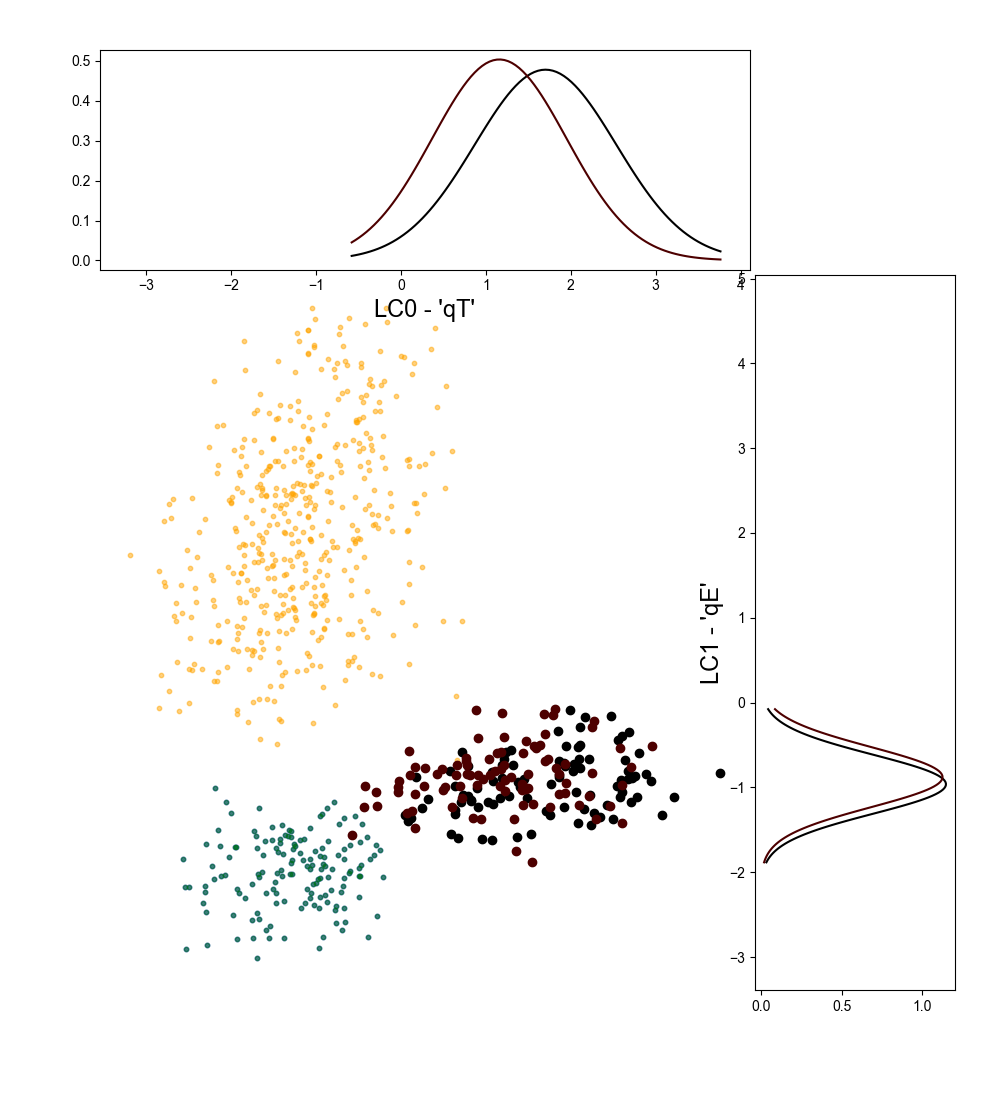

In [42]:

elem = exp_set[38]
diff_labels_qE_wt4, mask = follow_the_trace(X, [elem.measure[1][i] for i in [2, 3]], ref_mask = elem.measure[1][2],  qI = False)


n=5

colors = plt.cm.gist_heat(np.linspace(0,1,n+1))

for n0, n1 in [(0,1), (2,1), (0,2)]:


    save_sub = "/evolution/wt4/2H_induction/"

    for lim_plot in range(0,n):
        X0,Y0 = plot_traces(diff_labels_qE_wt4, colors, lim_plot = lim_plot,liste = [1, 2, 4],  label_stamp = [2*i for i in range(n)], label_time = 'hours')
        plt.savefig(save_folder + save_sub + "q%s_q%s_%d_evolution_traj_qE.png"%("TEI"[n0],"TEI"[n1], lim_plot))
        plt.close("all")

    S1, S2 = coherence(X0,Y0)
    plt.savefig(save_folder + save_sub +  "q%s_q%s_%d_evolution_coherence_qE.png"%("TEI"[n0],"TEI"[n1], lim_plot))
    plt.close("all")

In [38]:
trace_set[38].shape

(184, 4095)

# qE induction

In [ ]:

elem = exp_set[10]
diff_labels_qE_wt4, mask = follow_the_trace(X, [elem.measure[i][-1] for i in [0, 1, 2, 3]], ref_mask = elem.measure[0][-1],  qI = False)


n=5

colors = plt.cm.gist_heat(np.linspace(0,1,n+1))

for n0, n1 in [(0,1), (2,1), (0,2)]:


    save_sub = "/evolution/wt4/2H_induction/"

    for lim_plot in range(0,n):
        X0,Y0 = plot_traces(diff_labels_qE_wt4, colors, lim_plot = lim_plot,liste = [1, 2, 4],  label_stamp = [2*i for i in range(n)], label_time = 'hours')
        plt.savefig(save_folder + save_sub + "q%s_q%s_%d_evolution_traj_qE.png"%("TEI"[n0],"TEI"[n1], lim_plot))
        plt.close("all")

    S1, S2 = coherence(X0,Y0)
    plt.savefig(save_folder + save_sub +  "q%s_q%s_%d_evolution_coherence_qE.png"%("TEI"[n0],"TEI"[n1], lim_plot))
    plt.close("all")

# photoinhibition_followed_by_activation_wt4

In [ ]:
elem = exp_set[10]
diff_labels_qE_qI_4H, mask = follow_the_trace(X, [elem.measure[0][i] for i in [0,1, 2]] + [elem.measure[i][-1] for i in [0,1, 2]], elem.measure[0][-1], qI = False)

n=7
colors = plt.cm.gist_heat(np.linspace(0,1,n+1))

for n0, n1 in [(0,1), (2,1), (0,2)]:


    save_sub = "/evolution/photoinhibition_followed_by_activation_wt4_4H/"


    for lim_plot in range(0,n):
        X0,Y0 = plot_traces(diff_labels_qE_qI_4H, colors, lim_plot = lim_plot,liste = [1, 2, 4], label_stamp = [15*i for i in range(3)] + [240*i for i in range(4)], label_time = 'minutes')
        plt.savefig(save_folder +  save_sub +"q%s_q%s_%d_evolution_traj_qE.png"%("TEI"[n0],"TEI"[n1], lim_plot))
        plt.close("all")

    #S1, S2 = coherence(X0,Y0)
    #plt.savefig(save_folder + save_sub +  "q%s_q%s_%d_evolution_coherence_qE.png"%("TEI"[n0],"TEI"[n1], lim_plot))
    #plt.close("all")

In [ ]:
elem = exp_set[10]
#diff_labels_qE_qI_2H, mask = follow_the_trace(X, [elem.measure[0][i] for i in [0,1, 2]] + [elem.measure[i][-1] for i in [0,1, 2, 3]], elem.measure[0][-1], qI = False)

n=9
colors = plt.cm.gist_heat(np.linspace(0,1,n+1))

for n0, n1 in [(0,1), (2,1), (0,2)]:


    save_sub = "/evolution/photoinhibition_followed_by_activation_wt4_2H/"


    for lim_plot in range(0,n):
        X0,Y0 = plot_traces(diff_labels_qE_qI_2H, colors, lim_plot = lim_plot,liste = [1, 2, 4], label_stamp = [15*i for i in range(3)] + [120*i for i in range(5)], label_time = 'minutes')
        plt.savefig(save_folder +  save_sub +"q%s_q%s_%d_evolution_traj_qE.png"%("TEI"[n0],"TEI"[n1], lim_plot))
        plt.close("all")

    #S1, S2 = coherence(X0,Y0)
    #plt.savefig(save_folder + save_sub +  "q%s_q%s_%d_evolution_coherence_qE.png"%("TEI"[n0],"TEI"[n1], lim_plot))
    #plt.close("all")

# photoinhibition_followed_by_activation_stt7

In [ ]:
elem = exp_set[29]
diff_labels_qE_qI_stt7_2H, mask = follow_the_trace(X, [elem.measure[0][i] for i in [0,1, 2, 3]] + [elem.measure[i][-1] for i in [0,1, 2, 3]], elem.measure[0][-1], qI = False)

n=9
colors = plt.cm.gist_heat(np.linspace(0,1,n+1))

for n0, n1 in [(0,1), (2,1), (0,2)]:

    save_sub = "/evolution/photoinhibition_followed_by_activation_stt7_2H/"


    for lim_plot in range(0,n):
        X0,Y0 = plot_traces(diff_labels_qE_qI_stt7_2H, colors, lim_plot = lim_plot,liste = [1, 2, 4], label_stamp = [15*i for i in range(4)] + [120*i for i in range(4)], label_time = 'minutes')
        plt.savefig(save_folder +  save_sub +"q%s_q%s_%d_evolution_traj_qE.png"%("TEI"[n0],"TEI"[n1], lim_plot))
        plt.close("all")

    #S1, S2 = coherence(X0,Y0)
    #plt.savefig(save_folder + save_sub +  "q%s_q%s_%d_evolution_coherence_qE.png"%("TEI"[n0],"TEI"[n1], lim_plot))
    #plt.close("all")

In [ ]:
elem = exp_set[0]
diff_labels_qE_qI_stt7_4H, mask = follow_the_trace(X, [elem.measure[0][i] for i in [0,1, 2]] + [elem.measure[i][-1] for i in [0,1, 2]], elem.measure[0][0], qI = False)

n=7
colors = plt.cm.gist_heat(np.linspace(0,1,n+1))

for n0, n1 in [(0,1), (2,1), (0,2)]:


    save_sub = "/evolution/photoinhibition_followed_by_activation_stt7_4H/"


    for lim_plot in range(0,n):
        X0,Y0 = plot_traces(diff_labels_qE_qI_stt7_4H, colors, lim_plot = lim_plot,liste = [1, 2, 4], label_stamp = [15*i for i in range(3)] + [240*i for i in range(4)], label_time = 'minutes')
        plt.savefig(save_folder +  save_sub +"q%s_q%s_%d_evolution_traj_qE.png"%("TEI"[n0],"TEI"[n1], lim_plot))
        plt.close("all")

    #S1, S2 = coherence(X0,Y0)
    #plt.savefig(save_folder + save_sub +  "q%s_q%s_%d_evolution_coherence_qE.png"%("TEI"[n0],"TEI"[n1], lim_plot))
    #plt.close("all")

# photoinhibition_followed_by_activation_npq4_2H

In [ ]:
elem = exp_set[30]

diff_labels_qE_qI_2H_npq4, mask = follow_the_trace(X, [elem.measure[0][i] for i in [0,1, 2, 3]] + [elem.measure[i][-1] for i in [0,1, 2, 3]], elem.measure[0][-1], qI = False)
n=9
colors = plt.cm.gist_heat(np.linspace(0,1,n+1))

for n0, n1 in [(0,1), (2,1), (0,2)]:

    save_sub = "/evolution/photoinhibition_followed_by_activation_npq4_2H/"


    for lim_plot in range(0,n):
        X0,Y0 = plot_traces(diff_labels_qE_qI_2H_npq4, colors, lim_plot = lim_plot,liste = [1, 2, 4], label_stamp = [15*i for i in range(4)] + [120*i for i in range(4)], label_time = 'minutes')
        plt.savefig(save_folder +  save_sub +"q%s_q%s_%d_evolution_traj_qE.png"%("TEI"[n0],"TEI"[n1], lim_plot))
        plt.close("all")

    #S1, S2 = coherence(X0,Y0)
    #plt.savefig(save_folder + save_sub +  "q%s_q%s_%d_evolution_coherence_qE.png"%("TEI"[n0],"TEI"[n1], lim_plot))
    #plt.close("all")

In [ ]:
elem = exp_set[30]
diff_labels_qE_qI_4H_npq4, mask = follow_the_trace(X, [elem.measure[0][i] for i in [0,1, 2]] + [elem.measure[i][-1] for i in [0,1, 2]], elem.measure[0][-1], qI = False)
n=7
colors = plt.cm.gist_heat(np.linspace(0,1,n+1))

for n0, n1 in [(0,1), (2,1), (0,2)]:


    save_sub = "/evolution/photoinhibition_followed_by_activation_npq4_4H/"


    for lim_plot in range(0,n):
        X0,Y0 = plot_traces(diff_labels_qE_qI_4H_npq4, colors, lim_plot = lim_plot,liste = [1, 2, 4], label_stamp = [15*i for i in range(4)] + [120*i for i in range(4)], label_time = 'minutes')
        plt.savefig(save_folder +  save_sub +"q%s_q%s_%d_evolution_traj_qE.png"%("TEI"[n0],"TEI"[n1], lim_plot))
        plt.close("all")

    #S1, S2 = coherence(X0,Y0)
    #plt.savefig(save_folder + save_sub +  "q%s_q%s_%d_evolution_coherence_qE.png"%("TEI"[n0],"TEI"[n1], lim_plot))
    #plt.close("all")

# qE in WT4 slow activation

In [ ]:

elem = exp_set[27]
diff_labels_qE_slow, mask = follow_the_trace(X, [elem.measure[i][-1] for i in [0, 1, 2, 3,4,5]], qI = False, ref_mask = elem.measure[0][0])

n=6
colors = plt.cm.gist_heat(np.linspace(0,1,n+1))

for n0, n1 in [(0,1), (2,1), (0,2)]:

    save_sub = "/evolution/wt4/exp_only_induction/"


    for lim_plot in range(0,n):
        X0,Y0 = plot_traces(diff_labels_qE_slow, colors, lim_plot = lim_plot,liste = [1, 2, 4], label_stamp = [i for i in range(n)], label_time = 'hours')
        plt.savefig(save_folder +  save_sub +"q%s_q%s_%d_evolution_traj_qE.png"%("TEI"[n0],"TEI"[n1], lim_plot))
        plt.close("all")

    #S1, S2 = coherence(X0,Y0)
    #plt.savefig(save_folder + save_sub +  "q%s_q%s_%d_evolution_coherence_qE.png"%("TEI"[n0],"TEI"[n1], lim_plot))
    #plt.close("all")

# WT4 slow qI 

In [ ]:

elem = exp_set[27]
diff_labels_qI_slow, mask = follow_the_trace(X, [elem.measure[0][i] for i in [0, 1, 2, 3,4]], elem.measure[0][0], qI = False)
n=5
colors = plt.cm.gist_heat(np.linspace(0,1,n+1))

n0 =  1
n1 = 2

save_sub = "/evolution/wt4/photoinhibition/"


for lim_plot in range(0,n):
    X0,Y0 = plot_traces(diff_labels_qI_slow, colors, lim_plot = lim_plot,liste = [1, 2, 4], label_stamp = [15*i for i in range(n)], label_time = 'minutes')
    plt.savefig(save_folder +  save_sub +"q%s_q%s_%d_slow_WT4_qE.png"%("TEI"[n0],"TEI"[n1], lim_plot))
    plt.close("all")
  
#S1, S2 = coherence(X0,Y0)
#plt.savefig(save_folder + save_sub +  "q%s_q%s_%d_evolution_coherence_qE.png"%("TEI"[n0],"TEI"[n1], lim_plot))
#plt.close("all")

# WT4 4h 8h 

In [ ]:
elem = exp_set[5]
#diff_labels_qE_4h, mask = follow_the_trace(X, [elem.measure[i][-1] for i in [0,1, 2]], elem.measure[1][-1], qI = False)

n=4
colors = plt.cm.gist_heat(np.linspace(0,1,n+1))

n0 =  1
n1 = 2

save_sub = "/evolution/wt4/4H_induction/"


for lim_plot in range(0,n):
    X0,Y0 = plot_traces(diff_labels_qE_4h, colors, lim_plot = lim_plot,liste = [1, 2, 4], label_stamp = [4*i for i in range(n)], label_time = 'hours')
    plt.savefig(save_folder +  save_sub +"q%s_q%s_%d_evolution_traj_qE.png"%("TEI"[n0],"TEI"[n1], lim_plot))
    plt.close("all")
  
#S1, S2 = coherence(X0,Y0)
#plt.savefig(save_folder + save_sub +  "q%s_q%s_%d_evolution_coherence_qE.png"%("TEI"[n0],"TEI"[n1], lim_plot))
#plt.close("all")

# qI 45 min

In [ ]:
elem = exp_set[16]
#diff_labels_qE_45min, mask = follow_the_trace(X, [elem.measure[0][i] for i in [0,1, 2, 3]] + [elem.measure[i][-1] for i in [0,1, 2, 3, 4]], elem.measure[1][-1], qI = False)

n=9
colors = plt.cm.gist_heat(np.linspace(0,1,n+1))

n0 =  2
n1 = 1

save_sub = "/evolution/photoinhibition_followed_by_activation_stt7_45min/"


for lim_plot in range(0,n):
    X0,Y0 = plot_traces(diff_labels_qE_45min, colors, lim_plot = lim_plot,liste = [1, 2, 4], label_stamp = [15*i for i in range(4)] + [45*i for i in range(5)], label_time = 'minutes')
    plt.savefig(save_folder +  save_sub +"q%s_q%s_%d_evolution_traj_qE.png"%("TEI"[n0],"TEI"[n1], lim_plot))
    plt.close("all")
  
#S1, S2 = coherence(X0,Y0)
#plt.savefig(save_folder + save_sub +  "q%s_q%s_%d_evolution_coherence_qE.png"%("TEI"[n0],"TEI"[n1], lim_plot))
#plt.close("all")

# qI  in STT7-1

In [ ]:
elem = exp_set[0]

#diff_labels_qI_stt7, mask = follow_the_trace(X, [elem.measure[0][i] for i in range(4)], elem.measure[0][0], qI = True)

n0 = 0
n1=1

save_sub = "/evolution/stt7/photoinhibition/"


for lim_plot in range(0,5):
    X0,Y0 = plot_traces(diff_labels_qI_stt7, colors, lim_plot = lim_plot,liste = [1, 2, 4], label_stamp = [15*i for i in range(n)], label_time = 'minutes')
    plt.savefig(save_folder +  save_sub +"q%s_q%s_%d_evolution_traj_qE.png"%("TEI"[n0],"TEI"[n1], lim_plot))
    #plt.close("all")
  
S1, S2 = coherence(X0,Y0)
plt.savefig(save_folder + save_sub +  "q%s_q%s_%d_evolution_coherence_qE.png"%("TEI"[n0],"TEI"[n1], lim_plot))
plt.close("all")

# qI in WT4

In [ ]:
elem = exp_set[3]
diff_labels_qI_wt4, mask = follow_the_trace(X, [elem.measure[0][i] for i in range(4)], elem.measure[0][0], qI = True)



n0 = 0
n1=1

save_sub = "/evolution/wt4/photoinhibition/"


for lim_plot in range(0,5):
    X0,Y0 = plot_traces(diff_labels_qI_wt4, colors, lim_plot = lim_plot,liste = [1, 2, 4], label_stamp = [15*i for i in range(n)], label_time = 'minutes')
    plt.savefig(save_folder +  save_sub +"fast_q%s_q%s_%d_evolution_traj_qI_4h.png"%("TEI"[n0],"TEI"[n1], lim_plot))
    #plt.close("all")
  
S1, S2 = coherence(X0,Y0)
plt.savefig(save_folder + save_sub +  "fast_q%s_q%s_%d_evolution_coherence_qI_4h.png"%("TEI"[n0],"TEI"[n1], lim_plot))
plt.close("all")

In [ ]:
X = transform_data(diff_labels_qI_wt4[:,0,:].T, RTr)

back_image = np.copy(mask)*0
i=0
for label in np.unique(mask):
    s = np.sum(mask==label)
    if label !=0 and s>5 and s<60:
        back_image[mask==label] = X[i,2]
        i+=1
        
for cmap in ['GnBu']:
    plt.figure(figsize=(20, 20))
    image = plt.imshow(back_image, cmap = cmap)
    plt.axis("off")
    divider = make_axes_locatable(plt.gca())
    axdef = divider.append_axes("bottom", "5%", pad="3%")
    cbar = plt.colorbar(image, cax=axdef, orientation = "horizontal")
    cbar.ax.tick_params(labelsize=30, size = 15, width = 3)
    plt.tight_layout()
    plt.savefig(save_folder + "/heterogeneity/qI_wt4_no_act_first_illlumination_qI_axis.pdf")


## WT 4H 8H

In [ ]:
elem = exp_set[5]

diff_labels_qI_wt4, mask = follow_the_trace(X, [elem.measure[1][0],
                                                elem.measure[1][1],
                                                elem.measure[1][2], 
                                                elem.measure[1][3],  
                                                ], elem.measure[1][0], qI = False)


colors = ["k", "r", "r", "r", "r"]#plt.cm.tab20(np.linspace(0,1,6))

n0 =  0
n1 = 2
#X0,Y0 = plot_traces(diff_labels_qI_wt4, colors, lim_plot = 4, liste = [1, 2, 4, 3], label_stamp = [15*i for i in range(n)], label_time = 'minutes')

diff_labels = np.copy(diff_labels_qI_wt4)
L = diff_labels.shape[1]

N = 9
X = []
for i in range(L):
    x = transform_data(diff_labels[:,i,:].T, RTr)
    X.append(x)

X = np.array(X)

Q1 = np.expand_dims(np.quantile(X, 0.01, axis=1), 1)
Q3 = np.expand_dims(np.quantile(X, 0.99, axis=1), 1)
select = (X>Q1)*(X<Q3)
select = select.min(axis = 2)
select = select.min(axis=0)
X = X[1:,select,:]
    


In [ ]:
i = 5
def cercle_inscrit(X,Y):

    plt.figure()
    plt.scatter(X,Y)
    v0 = np.array([X[0], Y[0]])
    v1 = np.array([X[1], Y[1]])
    v2 = np.array([X[2], Y[2]])
    def get_mediatrice(v0, v1):
        u0 = v1-v0
        m0 = v0 + u0/2
        a = u0[0]
        b = u0[1]
        c = -a*m0[0]-b*m0[1]  
        x = np.linspace(0.8, 2, 200)
        plt.scatter(x, -(c+a*x)/b)
        plt.scatter(m0[0], m0[1] )
        plt.axis("equal")
        
        return (a,b,c)
    
    A = np.array([get_mediatrice(v0, v1), get_mediatrice(v1, v2), get_mediatrice(v0, v2)])
    b = np.array([0, 0, 0])
    print(A)
    print(b)
    x = np.linalg.solve(A, b)
    plt.scatter(x[0], x[1])

    plt.show()
cercle_inscrit(X[:,i,0],X[:,i,1])

In [ ]:


    
n0 = 0
n1 = 1


# make plot 

plt.figure()
for i in range(3):
    plt.scatter(X[i,:,n0],X[i,:,n1], c='k')
    
stdx = []
stdy = []


for i in np.random.randint(1, X.shape[1], 30):
    # somehow compute center of cloud, use e.g. medium or mean
    x = X[:,i,n0]
    y = X[:,i,n1]
    #plt.scatter(x,y)
    x0 = np.mean(x, axis = 0)
    y0 = np.mean(y, axis = 0)
    # compute radius
    r = np.sqrt((x - x0)**2 + (y - y0)**2)
    t = 100 # percent
    r0 = np.percentile(r, t)
    n_within = (r < r0).sum()
    circle = plt.Circle((x0, y0), r0, color='r', fill=False)
    plt.gca().add_artist(circle)
    stdx.append(np.std(X[:,i, n0]))
    stdy.append(np.std(X[:,i, n1]))
    
    plt.axis("equal")
    plt.xlabel("q" + "TEI"[n0])
    plt.ylabel("q" + "TEI"[n1])
    
plt.savefig(save_folder + "/heterogeneity/scatter_3_points_q%s_q%s.png"%("TEI"[n0] ,"TEI"[n1]))
    

#plt.axis([0, 30, 0, 20])
#plt.show()
plt.figure()
n, bins, patch = plt.hist(stdx, bins=20, range=(0,2.2), label = "intra-cell heterogeneity")
plt.hist(np.std(X[:,:,n0], axis = 1), bins=bins, label = "inter-cell heterogeneity")
plt.xlabel("q" + "TEI"[n0])
plt.legend()
plt.savefig(save_folder + "/heterogeneity/hist_3_points_q%s.png"%("TEI"[n0]))


plt.figure()
n, bins, patch = plt.hist(stdy, density=1, bins=20, range=(0,1.6), label = "intra-cell heterogeneity")
plt.hist(np.std(X[:,:,n1], axis = 1), bins=bins, label = "inter-cell heterogeneity")
plt.xlabel("q" + "TEI"[n1])
plt.legend()

plt.savefig(save_folder + "/heterogeneity/hist_3_points_q%s.png"%("TEI"[n1]))


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# generate some random points
n = 1000
x = 4 * np.random.randn(n) + 15
y = 2 * np.random.randn(n) + 10

# somehow compute center of cloud, use e.g. medium or mean
x0 = np.median(x)
y0 = np.median(y)

# compute radius
r = np.sqrt((x - x0)**2 + (y - y0)**2)
t = 80 # percent
r0 = np.percentile(r, t)
n_within = (r < r0).sum()

# make plot    
plt.plot(x, y, '.')
circle = plt.Circle((x0, y0), r0, color='r', fill=False)
plt.gca().add_artist(circle)
plt.title('Found center at ({:.2f}, {:.2f})\n'
          '{}% radius is {:.2f}\n'
          '{} / {} points within circle'.format(
          x0, y0, t, r0, n_within, n))
plt.axis([0, 30, 0, 20])
plt.show()

In [ ]:
elem = exp_set[9]
diff_labels_qI_wt4, mask = follow_the_trace(X, [elem.measure[2][-2], 
                                                elem.measure[2][-1],  
                                                elem.measure[3][-2] , 
                                                elem.measure[3][-1]  ], qI = False)


colors = ["r", "r", "r", "r"]#plt.cm.tab20(np.linspace(0,1,6))

n0 =  0
n1 = 1
X0,Y0 = plot_traces(diff_labels_qI_wt4, colors, lim_plot = 4, liste = [1, 2, 4])
#S1, S2 = coherence(X0,Y0)

In [ ]:

couples = np.array(liste_pair)[positions_to_keep]
@delayed
@wrap_non_picklable_objects
def get_ratio_from_video(start_vid, F0, F1, transform, mask_flat):
        video = imageio.get_reader(start_vid)
        frame_250 = skimage.transform.warp(video.get_data(250), transform)
        frame_F0 =  skimage.transform.warp(video.get_data(F0), transform)
        frame_F1 = skimage.transform.warp(video.get_data(F1), transform)
        r0  = (frame_250 - frame_F0)/frame_F0
        r1 = (frame_250 - frame_F1)/frame_F1
        diff = r1-r0
        diff = np.nan_to_num(diff, neginf=0, nan=0, posinf=0) 
        return diff.flatten()[mask_flat!=0]





ims = []
for m in [0, 1]:
    n0 = 0
    n1 = 1
    video = elem.measure[(0, 1)[m]][(0, -1)[m]] + "/video.tiff"

    video = imageio.get_reader(video)
    ims.append(video.get_data(250))


ims_sum = np.sum(np.array(ims), axis = 0)
plt.figure()
plt.imshow(ims_sum)
plt.title("shifted")

# unique mask


exp_data = elem.measure[(0, 1)[0]][(0, -1)[0]] + "/items_dict.npy"

exp_data = np.load(exp_data, allow_pickle=True).item()
mask = exp_data["labels"]

mask_flat = mask.flatten()

transforms = []


diffs = []


for j in [0, 1]:
    shift, error, diffphase = skimage.registration.phase_cross_correlation(ims[j], ims[0], upsample_factor=100)
    shift = np.roll(shift,1)
    tform = skimage.transform.AffineTransform(translation = shift)
    transforms.append(tform)
    ims[j] = skimage.transform.warp(ims[j], tform)*255
    #masks.append(skimage.transform.warp(mask, tform))
    #mask_j = skimage.transform.warp(mask, tform)

    video =elem.measure[(0, 1)[j]][(0, -1)[j]] + "/video.tiff"


    diff = Parallel(n_jobs = -1 )(get_ratio_from_video(video, couple[0], couple[1], tform, mask_flat) for couple in couples)
    diff = np.array(diff)
    diffs.append(diff)
    print(diff.shape)
diffs = np.array(diffs)

ims_sum = np.sum(np.array(ims), axis = 0)
plt.figure()
plt.imshow(ims_sum)
plt.title("corrected shift")

diff_labels = []
for label in np.unique(mask):
    s = np.sum(mask==label)
    if label !=0 and s>5 and s<60:
        diff_labels.append(np.mean(diffs[:,:,mask_flat[mask_flat!=0]==label], axis = -1))

diff_labels = np.array(diff_labels)
diff_labels.shape


In [ ]:

X0, Y0 = plot_traces(diff_labels, colors, liste = [3, 5])
#S1, S2 = coherence(X0,Y0)
plt.figure()
plt.quiver(X0[0], Y0[0], X0[1] - X0[0], Y0[1] - Y0[0], scale = 100) 
plt.figure()
v =np.random.randint(1, X0.shape[1], 40)
plt.plot(X0[:,v], Y0[:,v], 'o--')
plt.figure()
plt.scatter(X0[0], Y0[1])
plt.figure()
plt.scatter(X0[1], Y0[0])

# Kinetics

In [ ]:
def fit_exp_timeslot(x, y, begin, end):
        
    x = x[begin:end]
    y = y[begin:end]
    x0 = [1,1,1]
    function_to_fit = exp_decay        
    ypred, params = get_fit(x ,y, x0,  function_to_fit)
    
    return ypred, params, x, y




def remove_outliers(X, q1=0.05, q3=0.95):

    Q1 = np.quantile(X, q1)
    Q3 = np.quantile(X, q3)
    select = (X>Q1)*(X<Q3)
    
    return select
    

# qE first decay

In [ ]:
def decay_qE(x, y):
    n1 = 244
    n2 = 250
    begin = n1 + np.argmax(y[n1:250])
    end = n2 + np.argmin(y[n2:280])+10

    ypred, params, x, y  =  fit_exp_timeslot(x, y, begin, end)
    return ypred, params, x, y  

c = 2
qE_traces = all_actinic[all_classes[0] == c]
qE_times =  times_set[all_classes[0] == c]
plt.figure()
pos = random.randint(0, qE_traces.shape[0]-1)
x = qE_times[pos]
y = qE_traces[pos]
#plt.plot(x,y )
k=0
ypred, tau, x1, y1 = decay_qE(x, y)
plt.plot(x[240:550], y[240:550], label = exp_description[c])
plt.plot(x1, y1)
plt.plot(x1, ypred, 'k')
plt.legend()


## multiple classes

In [ ]:
plt.figure()

for c in [2, 5, 20, 21]:
    qE_traces = all_actinic[all_classes[0] == c]
    qE_times =  times_set[all_classes[0] == c]
    output = Parallel(n_jobs=-1)(delayed(decay_qE)(qE_times[i], qE_traces[i]) for i in range(qE_times.shape[0]))
    u = list(zip(*output))
    X = np.array(u[1])[:,1]
    select = remove_outliers(X)
    X = X[select]
    plt.plot(X, '.', label = exp_description[c])
plt.legend()

# compare to vector qE

In [ ]:
c = 2
plt.figure()

for c in [2, 20, 21]:
    qE_traces = all_actinic[all_classes[0] == c]
    qE_times =  times_set[all_classes[0] == c]
    output = Parallel(n_jobs=-1)(delayed(decay_qE)(qE_times[i], qE_traces[i]) for i in range(qE_times.shape[0]))
    u = list(zip(*output))
    TAU = np.array(u[1])[:,1]
    select = remove_outliers(TAU)
    ind = labels == c
    XT =  transform_data(data, RTr)
    X = XT[ind]
    plt.scatter(TAU[select],  X[select,1])

## qT only

In [ ]:
def rise_qT_only(x, y):
    n1 = 250
    n2 = 250
    begin = n1 + np.argmin(y[n1:500])
    end = n2 + np.argmax(y[n2:550])+10

    ypred, params, x, y  =  fit_exp_timeslot(x, y, begin, end)
    return ypred, params, x, y  


c = 5
qE_traces = all_actinic[all_classes[0] == c]
qE_times =  times_set[all_classes[0] == c]
plt.figure()
pos = random.randint(0, qE_traces.shape[0]-1)
x = qE_times[pos]
y = qE_traces[pos]
#plt.plot(x,y )
k=0
ypred, tau, x1, y1 = rise_qT_only(x, y)
plt.plot(x[240:550], y[240:550], label = exp_description[c])
plt.plot(x1, y1)
plt.plot(x1, ypred, 'k')
plt.legend()

In [ ]:
plt.figure()

for c in [4]:
    qE_traces = all_actinic[all_classes[0] == c]
    qE_times =  times_set[all_classes[0] == c]
    output = Parallel(n_jobs=-1)(delayed(rise_qT_only)(qE_times[i], qE_traces[i]) for i in range(qE_times.shape[0]))
    u = list(zip(*output))
    X = np.array(u[1])[:,1]
    select = remove_outliers(X)
    X = X[select]
    plt.plot(X, '.', label = exp_description[c])
plt.legend()

In [ ]:
c = 4
plt.figure()

for c in [4]:
    qE_traces = all_actinic[all_classes[0] == c]
    qE_times =  times_set[all_classes[0] == c]
    output = Parallel(n_jobs=-1)(delayed(rise_qT_only)(qE_times[i], qE_traces[i]) for i in range(qE_times.shape[0]))
    u = list(zip(*output))
    TAU = np.array(u[1])[:,1]
    select = remove_outliers(TAU)
    ind = labels == c
    XT =  transform_data(data, RTr)
    X = XT[ind]
    plt.scatter(TAU[select],  X[select,0])

## HETEROGENEITY

In [ ]:
elem = exp_set[40]
diff_labels_qI_wt4, mask = follow_the_trace(5, [elem.measure[4][-1],
                                         ], ref_mask = elem.measure[4][-1], qI = False)


In [ ]:
plt.figure()
im0 = np.zeros(mask.shape)
D = 150
x = np.linspace(0, im0.shape[0], im0.shape[0])
im1 = np.tile(x, (im0.shape[1], 1)).T//D
x = np.linspace(0, im0.shape[1], im0.shape[1])
im2 = np.tile(x, (im0.shape[0],1))//D
mask_pos = im1+im2
plt.imshow(mask_pos)

In [ ]:
X = transform_data(diff_labels_qI_wt4[:,0,:].T, RTr)
ax=1
fig, axs = plt.subplots(2,1,figsize=(10, 10))

for axn, ax in enumerate([0,1]):
    back_image = np.copy(mask)*0.0
    i=0
    X_pos = []
    for label in np.unique(mask):
        
        s = np.sum(mask==label)
        if label !=0 and s>5:# and s<60:
            X_pos.append(np.mean(mask_pos[mask==label]))
            back_image[mask==label] = X[i,ax]
            i+=1

    for cmap in ['GnBu']:
        V = [8, 4, -20][ax]
        back_image[back_image>V]=V
        image = axs[axn].imshow(back_image, cmap = cmap)
        """
        plt.axis("off")
        divider = make_axes_locatable(plt.gca())
        axdef = divider.append_axes("bottom", "5%", pad="3%")
        cbar =plt.colorbar(image, cax=axdef, orientation = "horizontal")
        cbar.ax.tick_params(labelsize=30, size = 15, width = 3)
        plt.tight_layout()
        """
    
plt.savefig(save_folder + "/heterogeneity/CC124_long_act_last_illlumination_qT_axis.pdf")


In [ ]:
for label in [825]:
    s = np.sum(mask==label)
    if label !=0 and s>5:# and s<60:
        back_image[mask==label] = X[label,ax]
        i+=1

In [ ]:
#outliers
Q1 = np.expand_dims(np.quantile(X, 0.02, axis=0), 0)
Q3 = np.expand_dims(np.quantile(X, 0.98, axis=0), 0)
print(Q1.shape)
select = (X>Q1)*(X<Q3)
select = select.min(axis = 1)
#X = X[:,select,:]

In [ ]:
for i in np.unique(mask_pos):

    X_pos = np.array(X_pos)
    crosspos = select*(X_pos==i)
    print(crosspos.max())
    if crosspos.max():
        plt.figure()

        plt.scatter(X[crosspos,1], X[crosspos,2], c =[i]*np.sum(crosspos), cmap = "jet")
        plt.xlim(-5,12)
        plt.ylim(-4,6)

In [ ]:
crosspos.max()

In [ ]:
np.mean((X>Q1)*np.mean(X<Q3))